# HOUSE PRICE PREDICTION
<hr>


# Objectives and Steps of prediction
<hr>

This is to forecast house prices  <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The analysis will be following in the steps below (this is initial idea, will be changed later on)  

<br><br>



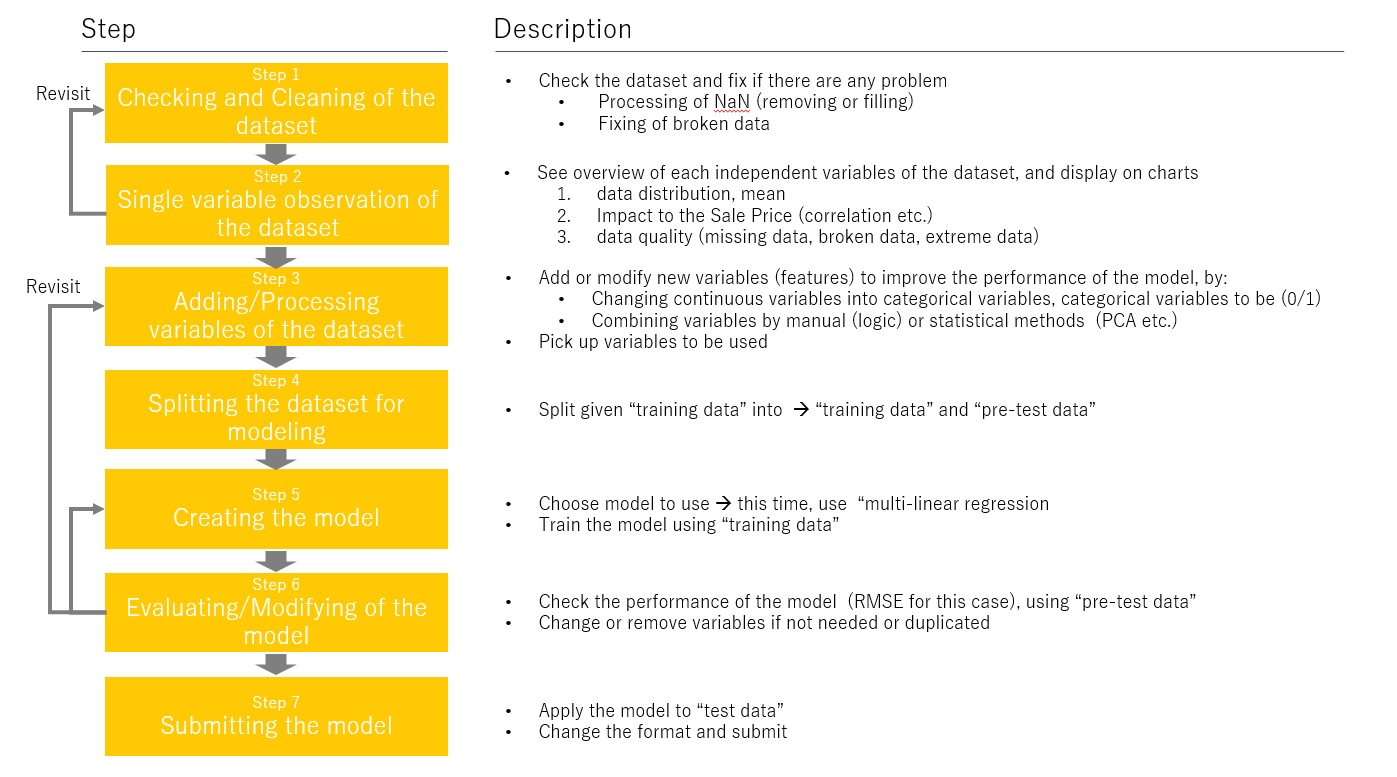

In [1]:
from IPython.display import Image
Image(filename= 'Steps_of_prediction1106.jpg')

<br><br><br><br>
# Step 1 :  Checking and Clearning of the dataset
<hr>

Here, import the training data and check if there is any missing data. 
If needed, clean them (ex. fill NaN) 

<br><br><br>
### Import training data
<hr>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train = pd.read_csv('../data/train.csv')  # Used for training and pre-testing
test  = pd.read_csv('../data/test.csv')  # Used later when submitting

In [28]:
train['data_origin'] = 'train'
test['data_origin'] = 'test' 

integ = pd.concat([train,test],sort=False)
integ.shape

(2919, 82)

<br><br><br>
### Check the data
<hr>

In [29]:
print(train.shape)
print(test.shape)
print(integ.shape)

(1460, 82)
(1459, 81)
(2919, 82)


seeing above, there are 81 data, including 1 data to be predicted ('SalePrice') 

Number of sample is 1460

The key parameters of the predicted dependent value ('SalePrice') is as below:

In [31]:
integ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

<br><br><br>
### Clean the data
<hr>

The data set are combination of number and non-number data. (object, that means string) 

Some variables are missing and not available for all samples, and many NaN data for non-number (object) variables. 
Since NaN may have important meaning, here, replace NaN into string "n.a" so that they can be shown in the charts. 

This is done only for non-number variables. 
As for numbre variabes (int, float), keep NaN as it is, since the missing values are limited and not sure which number to use for replacement (0? average?). 

In [32]:
for column_name in integ:
    dt = integ[column_name].dtypes
    if dt == 'object':
        integ[column_name] = integ[column_name].fillna(value='n.a')


In [33]:
integ.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   n.a      Reg   
1   2          20       RL         80.0     9600   Pave   n.a      Reg   
2   3          60       RL         68.0    11250   Pave   n.a      IR1   
3   4          70       RL         60.0     9550   Pave   n.a      IR1   
4   5          60       RL         84.0    14260   Pave   n.a      IR1   

  LandContour Utilities     ...      PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub     ...         n.a   n.a         n.a       0      2   
1         Lvl    AllPub     ...         n.a   n.a         n.a       0      5   
2         Lvl    AllPub     ...         n.a   n.a         n.a       0      9   
3         Lvl    AllPub     ...         n.a   n.a         n.a       0      2   
4         Lvl    AllPub     ...         n.a   n.a         n.a       0     12   

  YrSold SaleType  SaleCondition  SalePrice  data_origin  
0   2008       WD         Normal   208500.0        train  
1   2007       WD         Normal   181500.0        train  
2   2008       WD         Normal   223500.0        train  
3   2006       WD        Abnorml   140000.0        train  
4   2008       WD         Normal   250000.0        train  

[5 rows x 82 columns]

Data of non-number varialbes are filled. 



<br><Br><br>

# Step 2: Single variable observation of the dataset
<hr>

### Observation of target (dependent) variable - 'SalePrice'
<hr>

first, see the data quality and distribution of 'SalePrice' that is the data to be estimated.

In [35]:
integ[integ['data_origin']=='train']['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It seems the data quality is good for SalePrice.

No missing data, no zero data, or no extremely high data

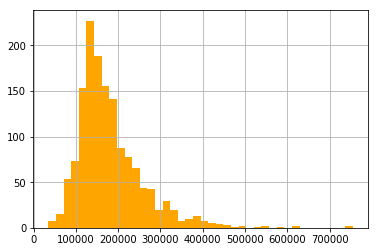

In [36]:
integ[integ['data_origin']=='train']['SalePrice'].hist(bins=40, color='orange')

seeing this, the distribution is like log-normal distribution. 

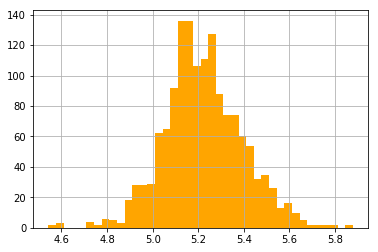

In [37]:
np.log10(integ[integ['data_origin']=='train']['SalePrice']).hist(bins=40, color='orange')

Log of the data is similar to normal distribution. ==> Therefore use log10(SalePrice) as the target variable. 

It seems there are two peaks.

<br><br><br>
### Observation of independent variables
<hr>

Then, see each variables potentially can be used for estimation. First charting the variables one by one, and then see by collective ways<br><br>

In the following, show all the variables. Numeric variables and non-numeric variables (categorical variables) will use different format.

<br><br>
#### a) Charting by each single data
<hr>

Here, see each independent variable by showing charts. 


For each independent variable, show 2 chart - left one is distribution of number of samples,  right one is relationship between the independent variable and SalePrice.

d:\y-data\venv\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\y-data\venv\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
d:\y-data\venv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPara

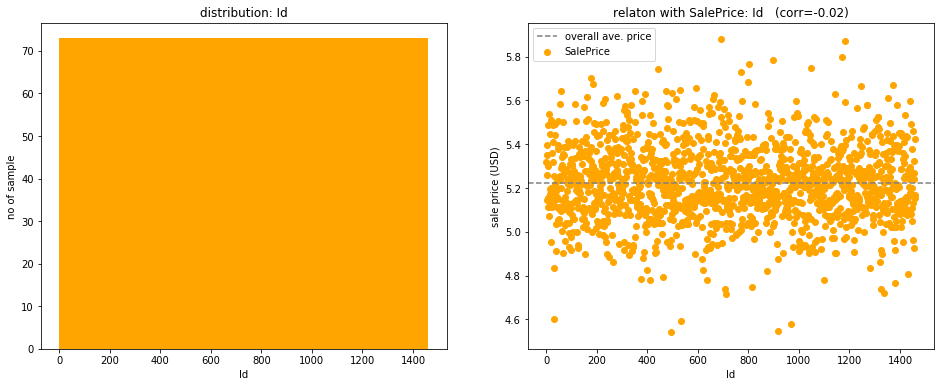

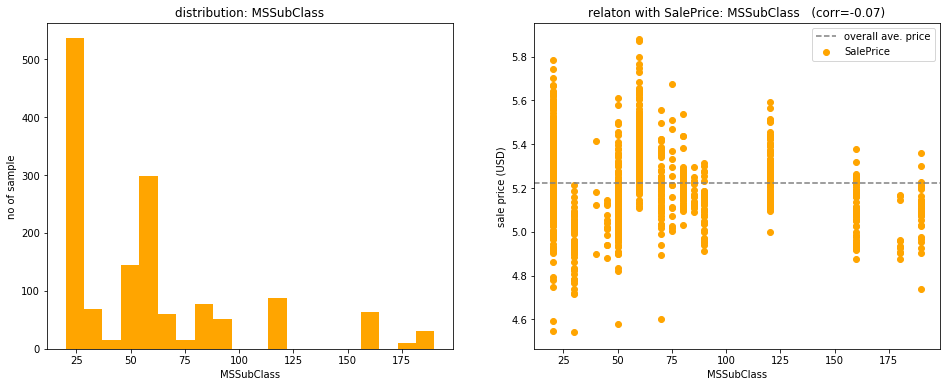

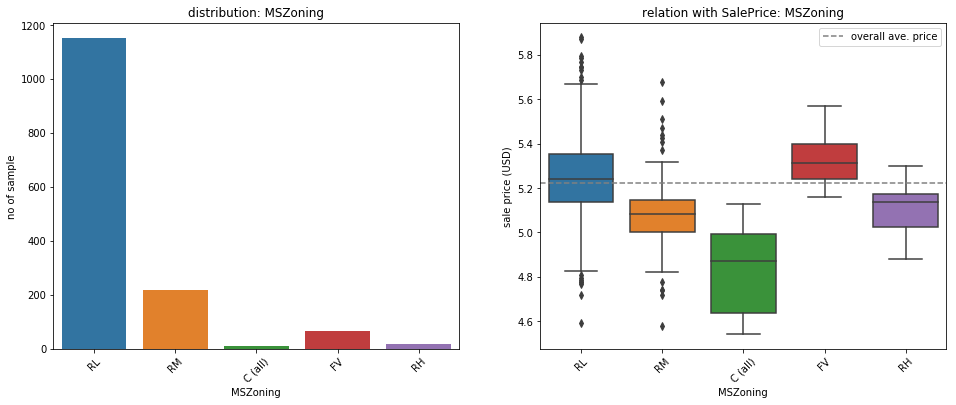

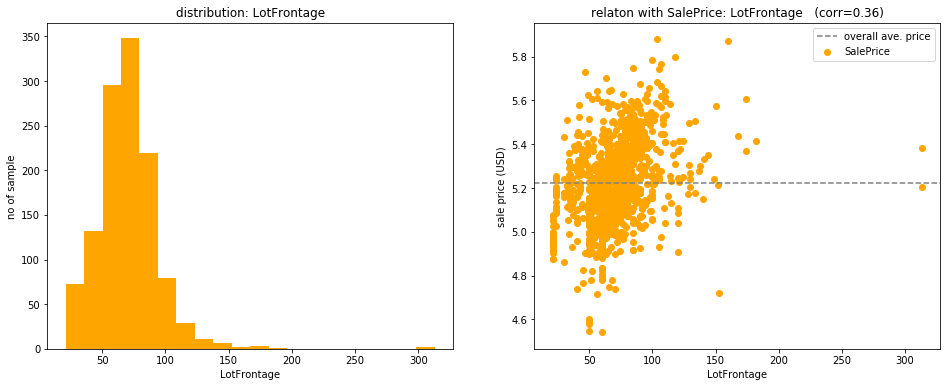

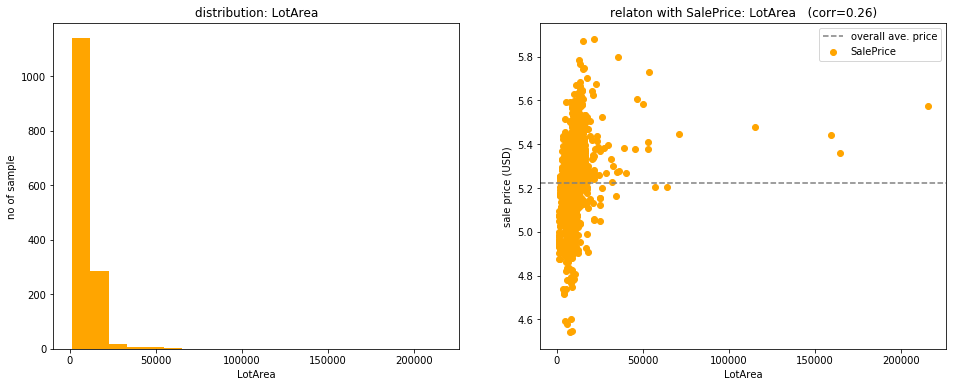

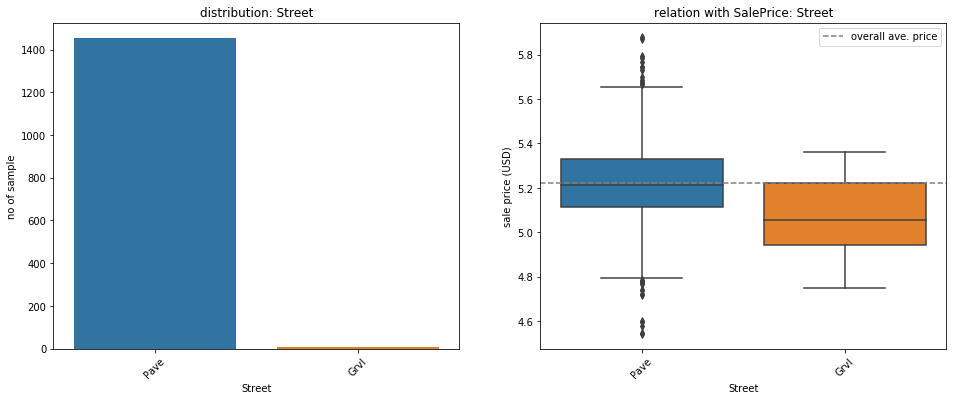

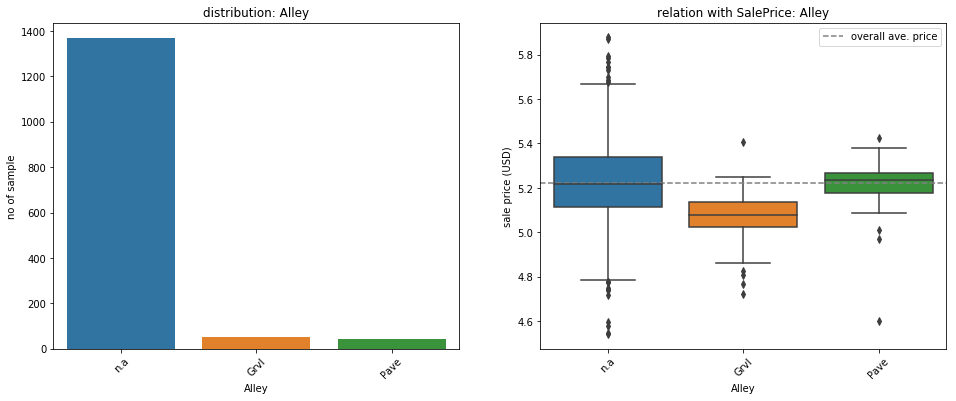

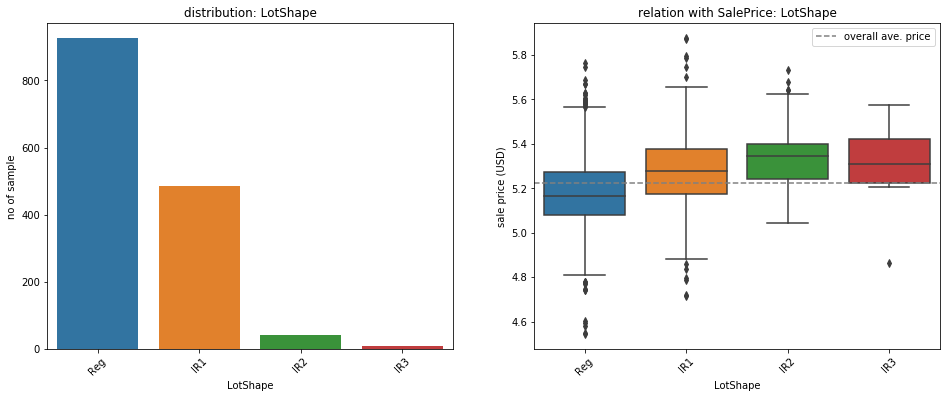

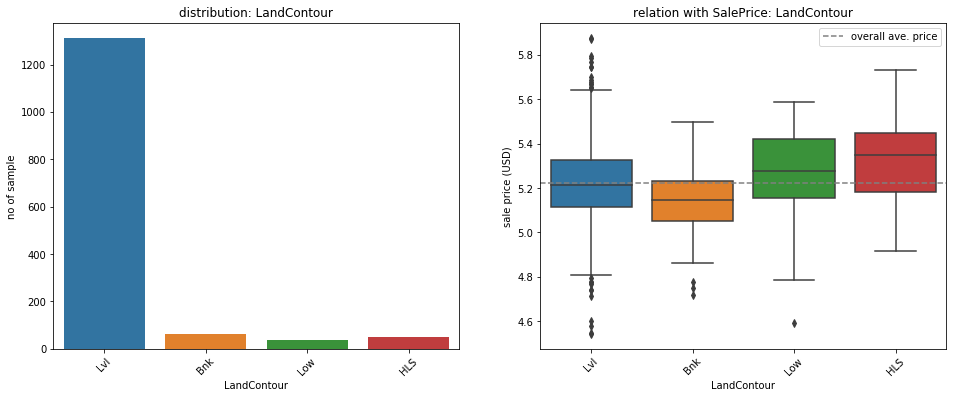

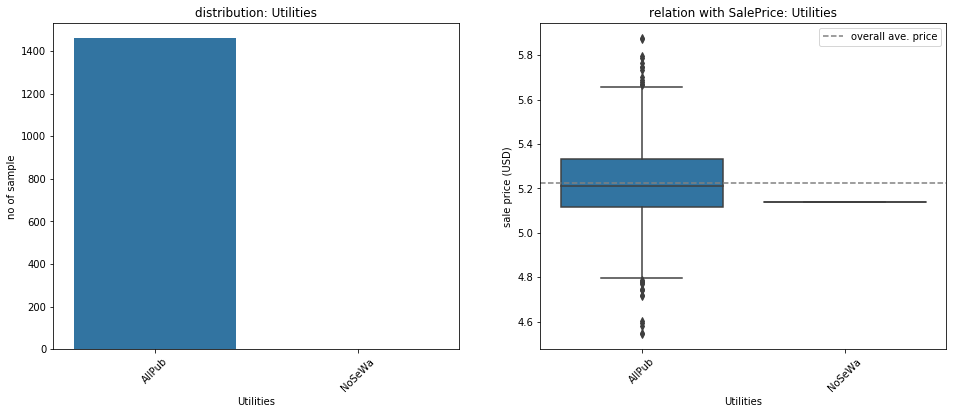

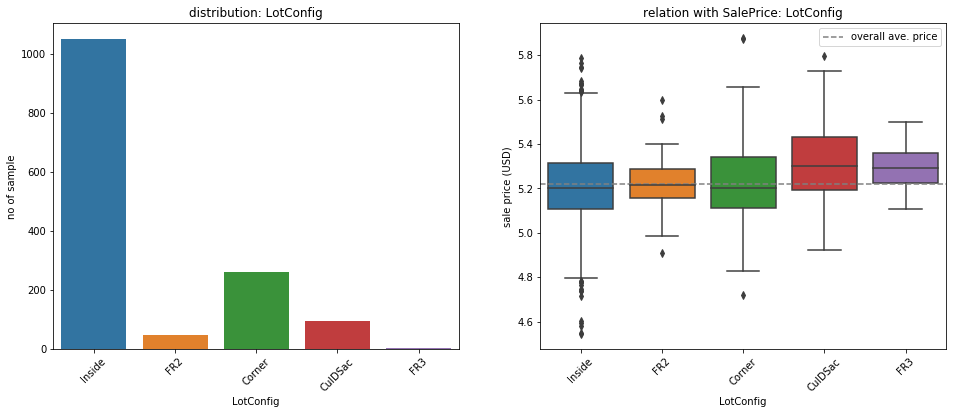

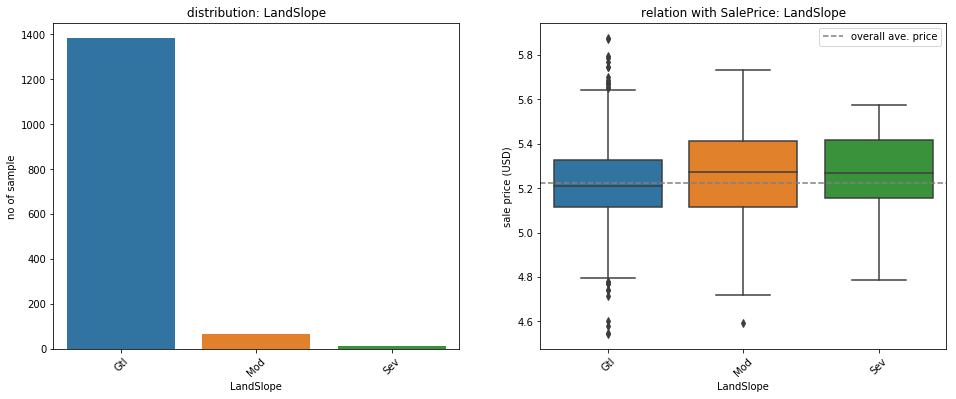

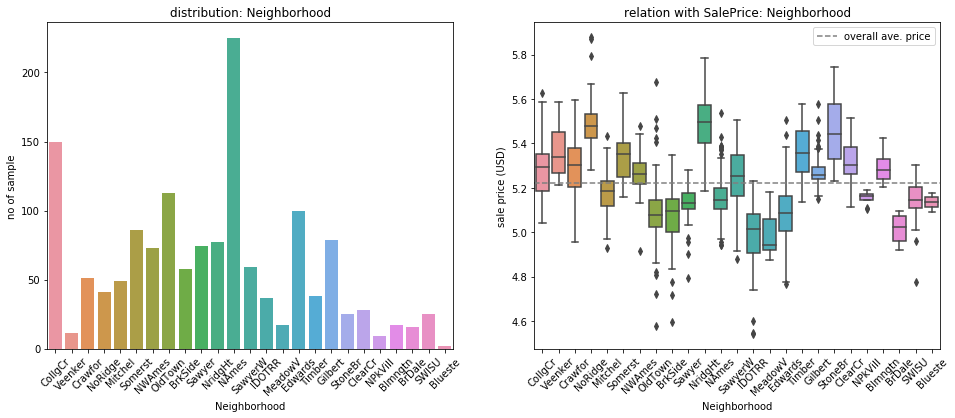

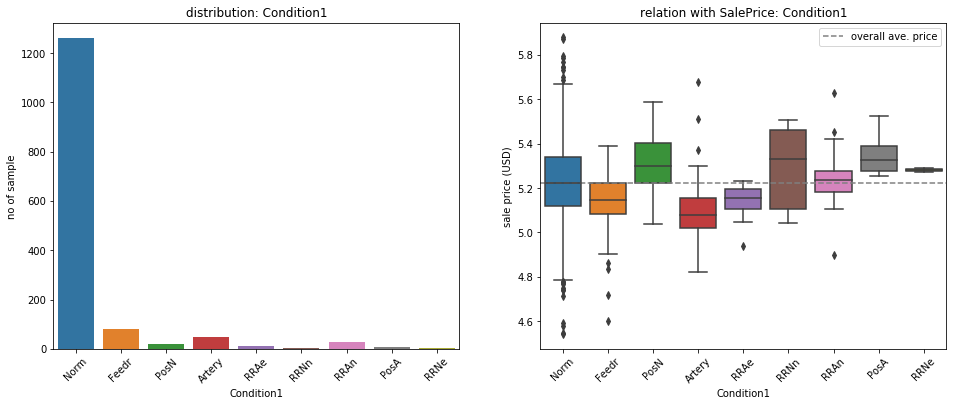

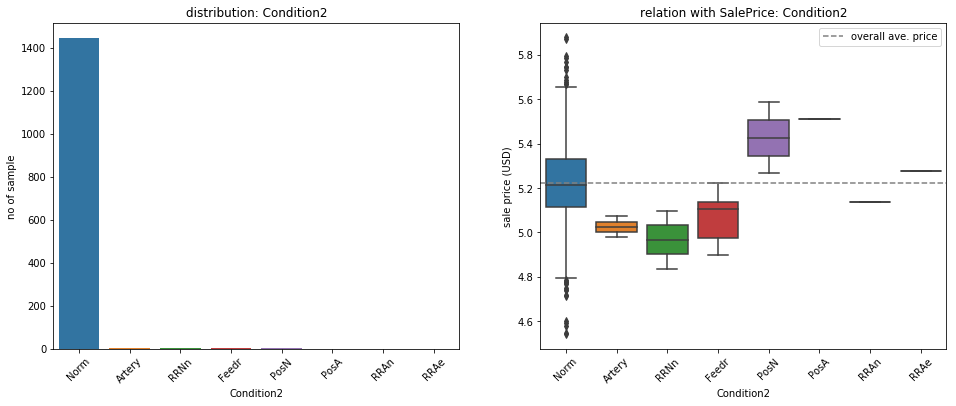

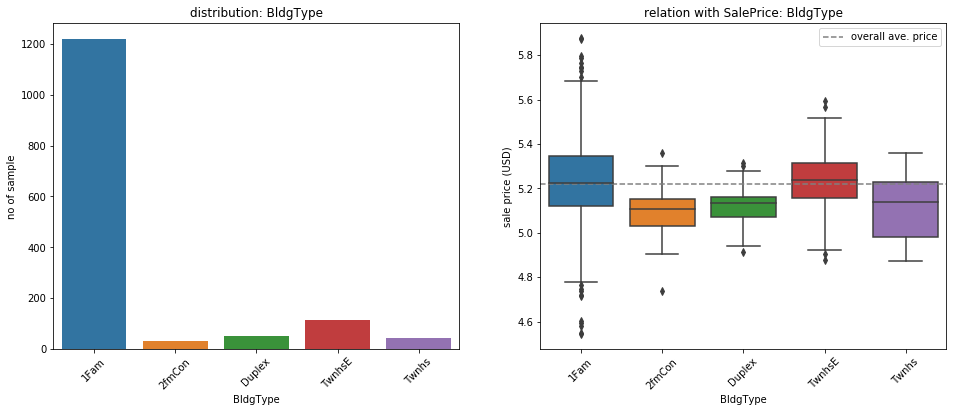

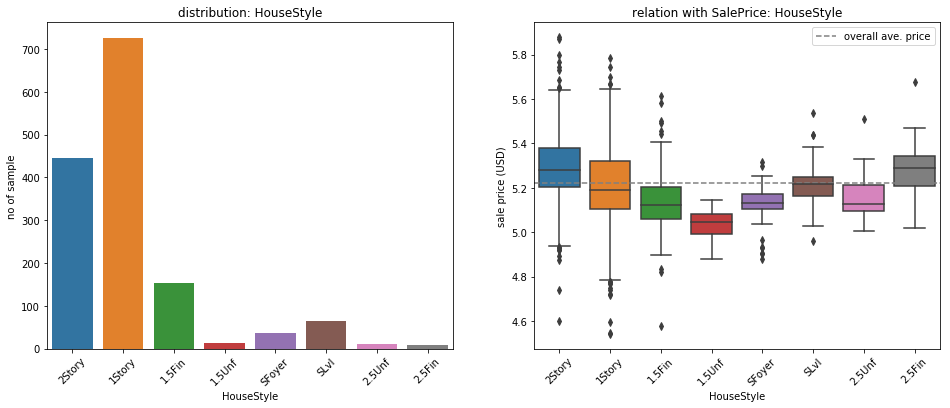

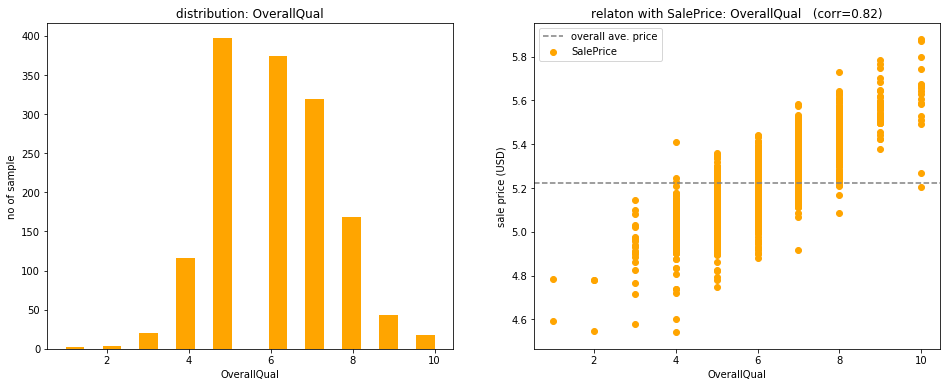

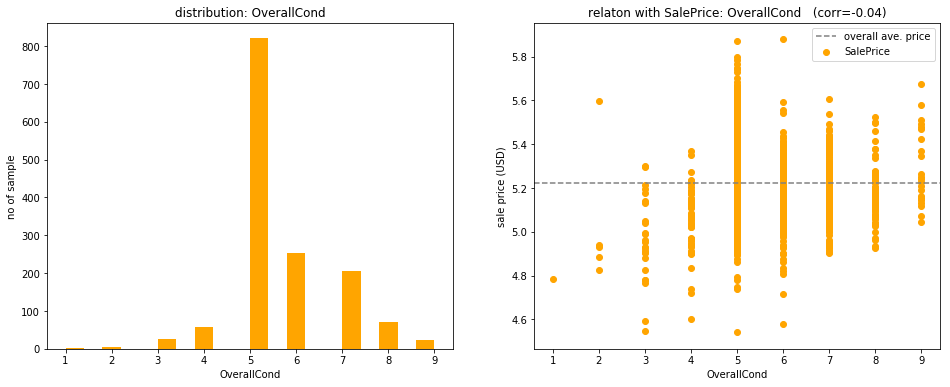

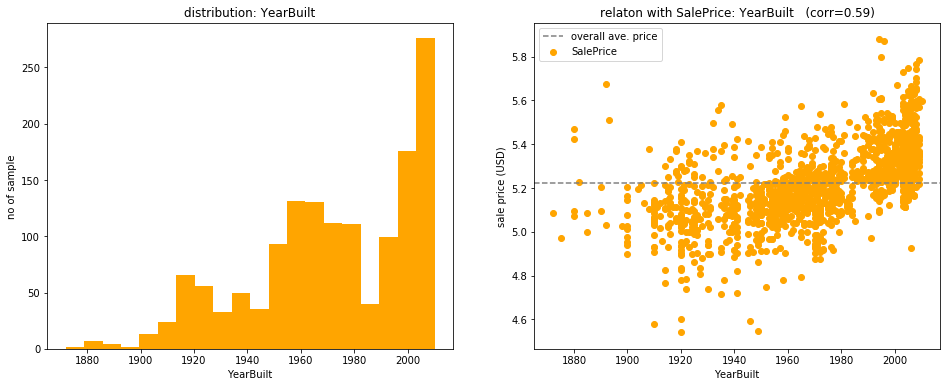

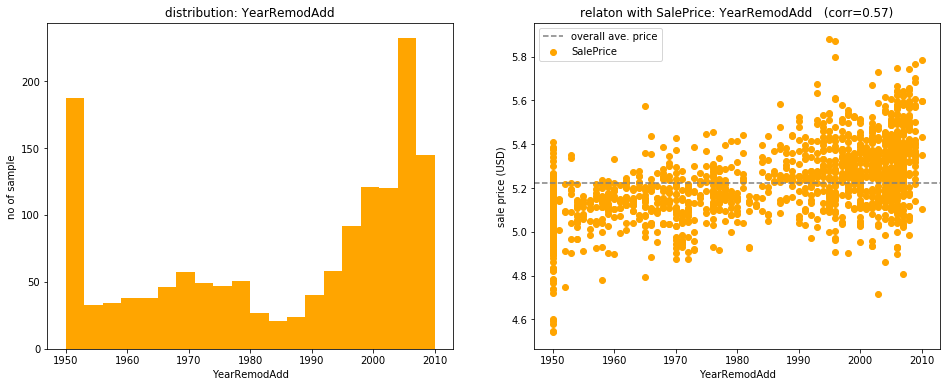

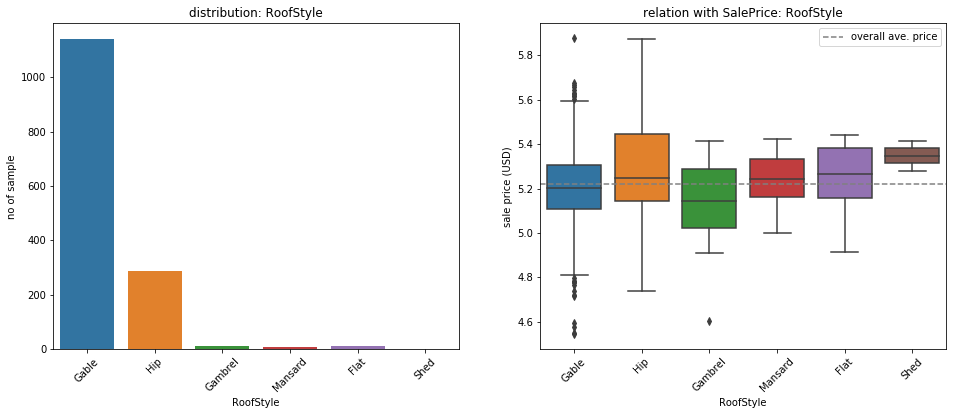

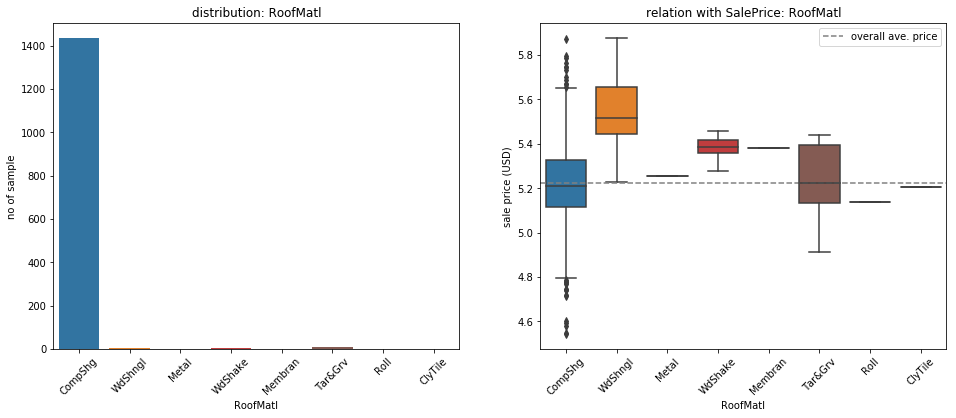

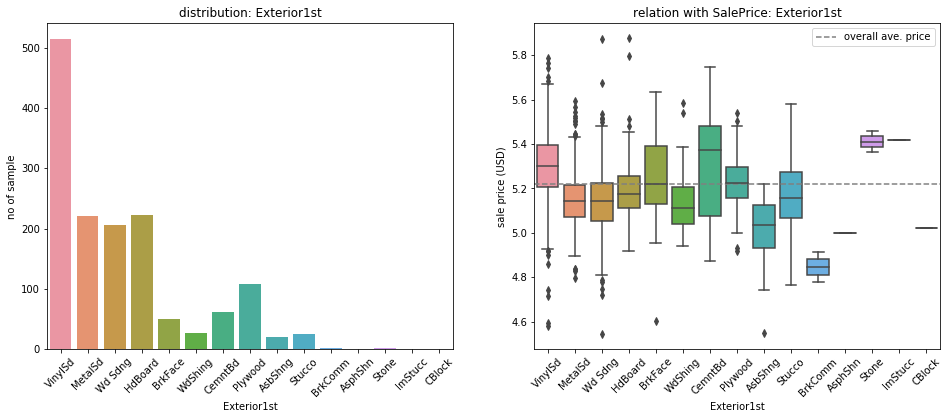

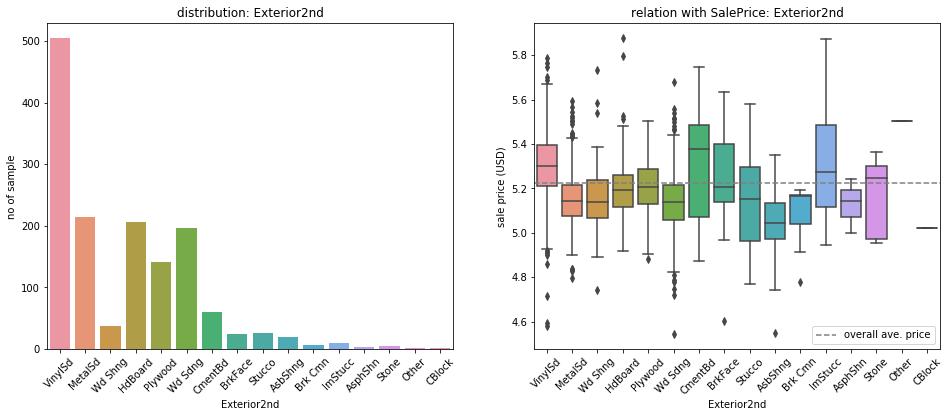

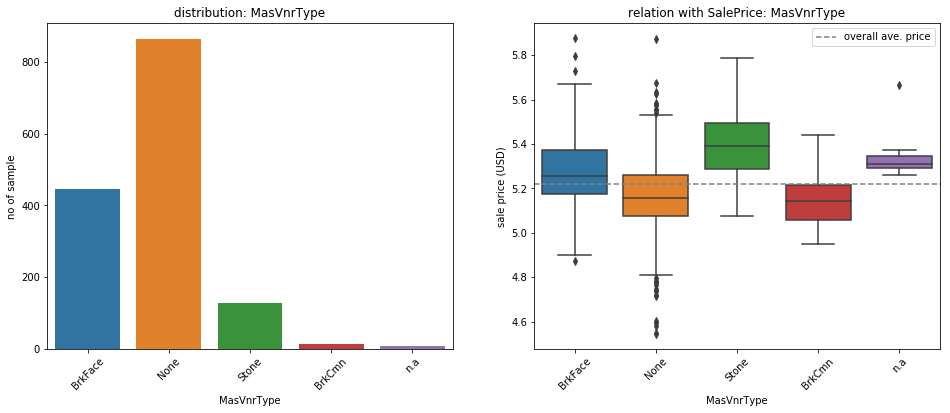

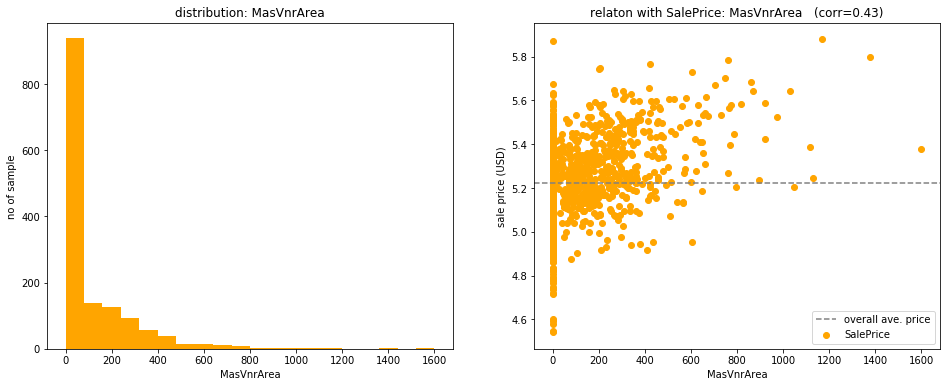

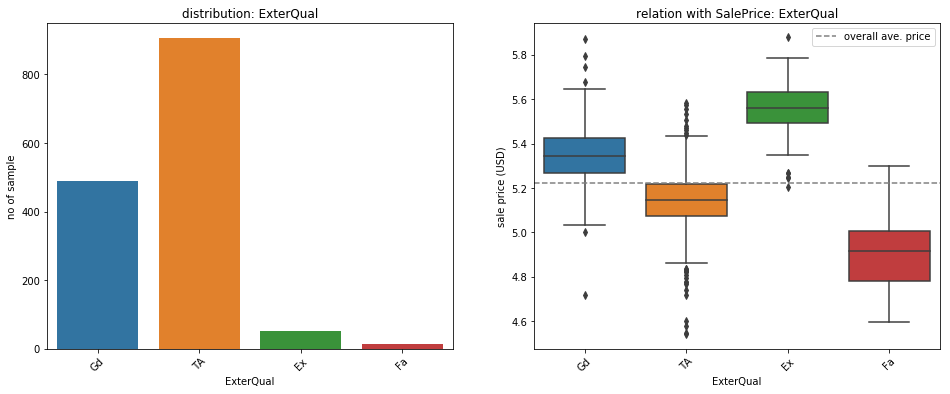

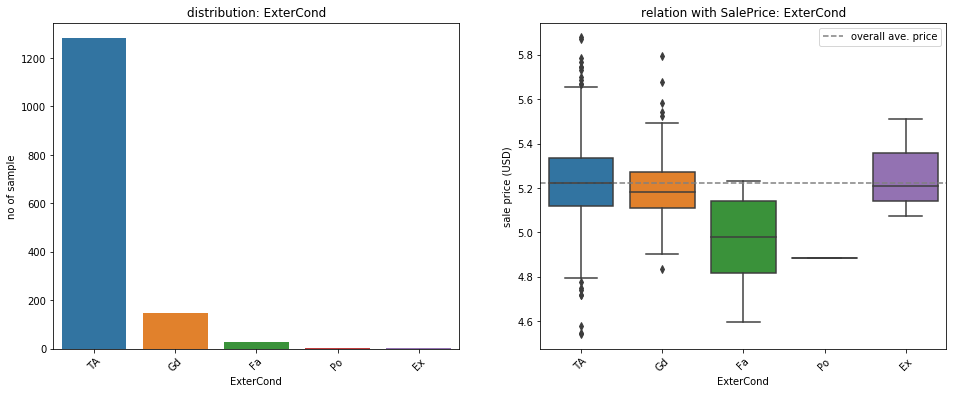

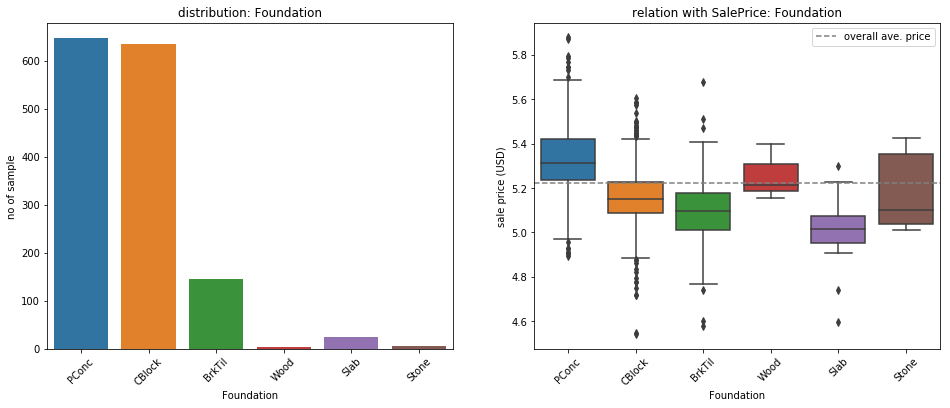

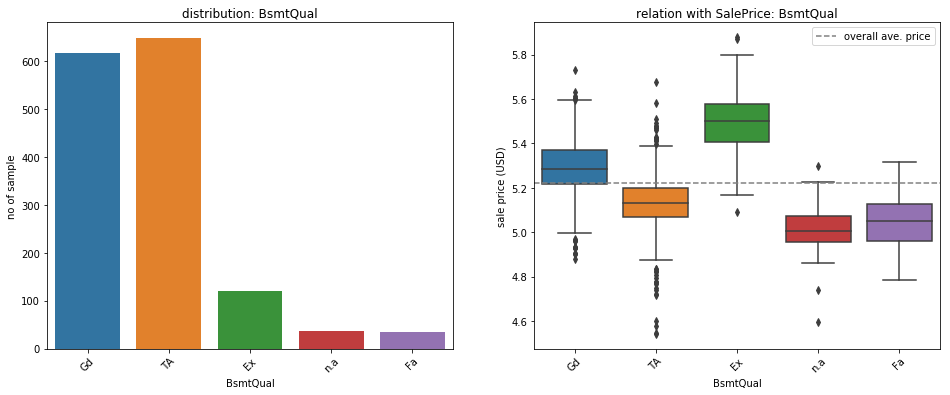

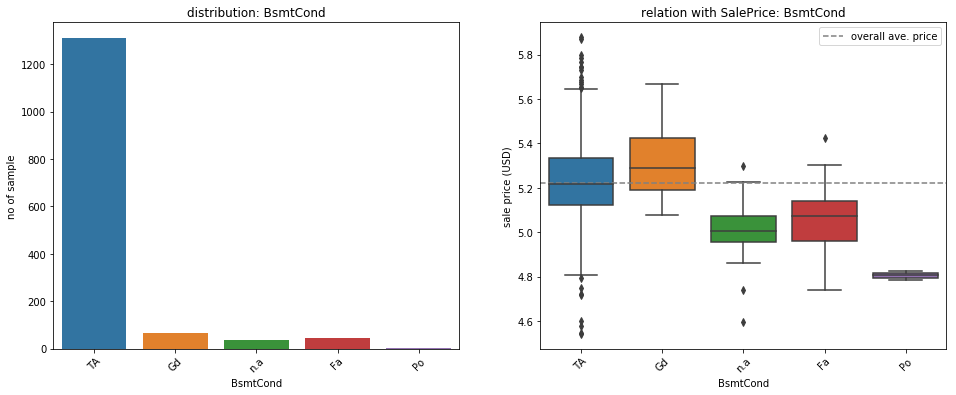

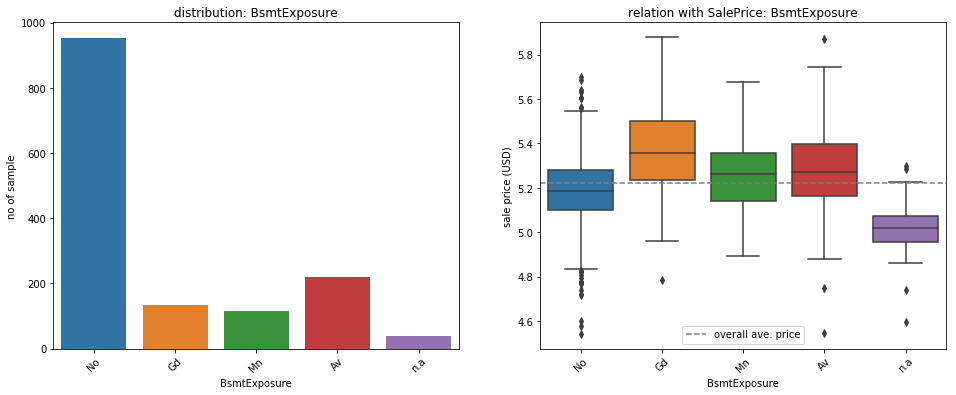

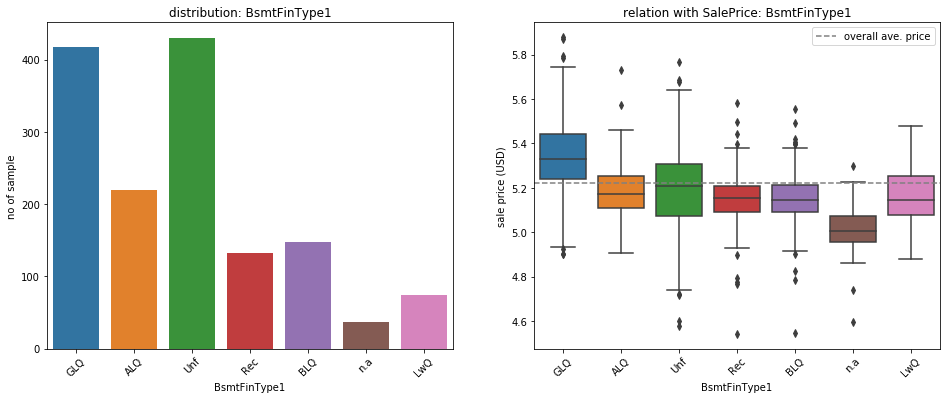

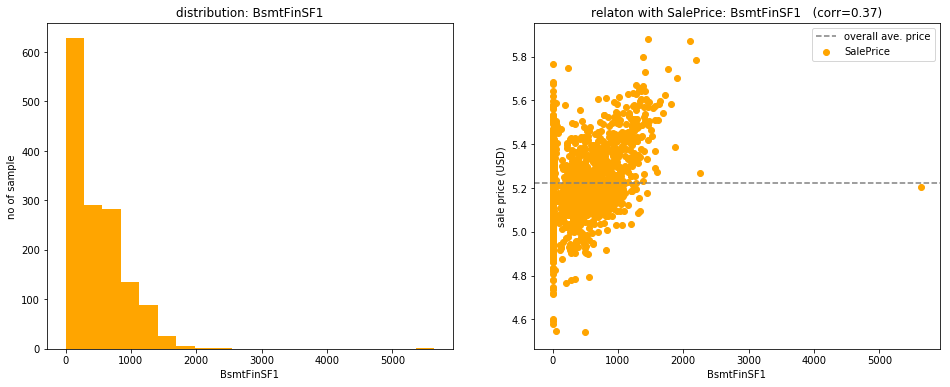

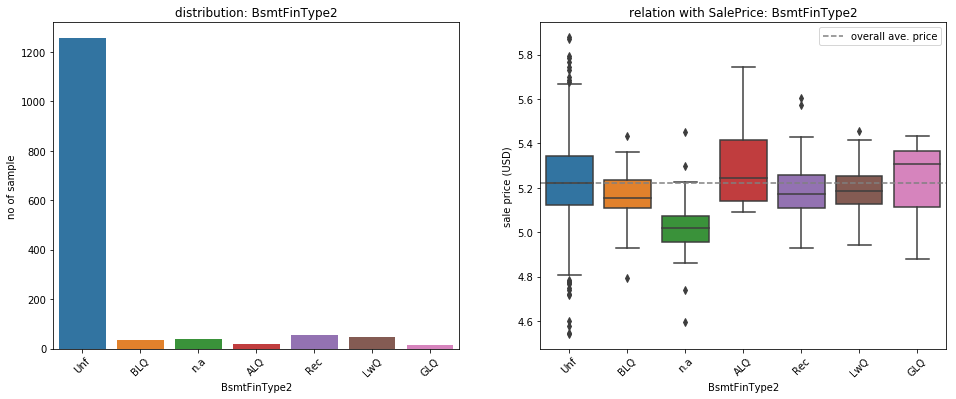

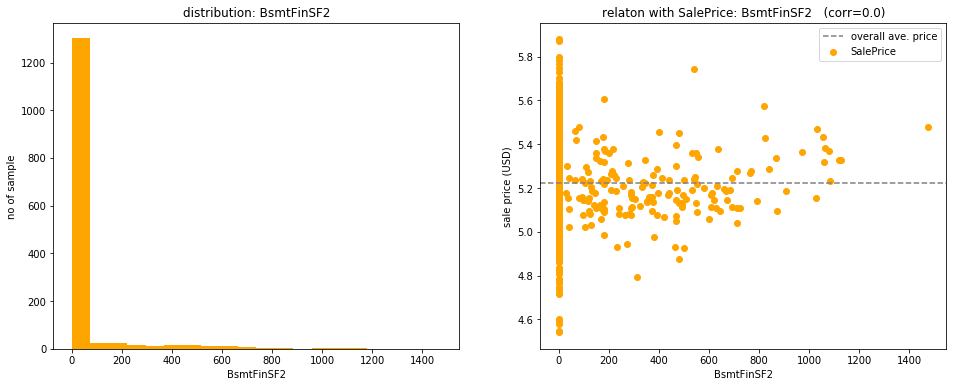

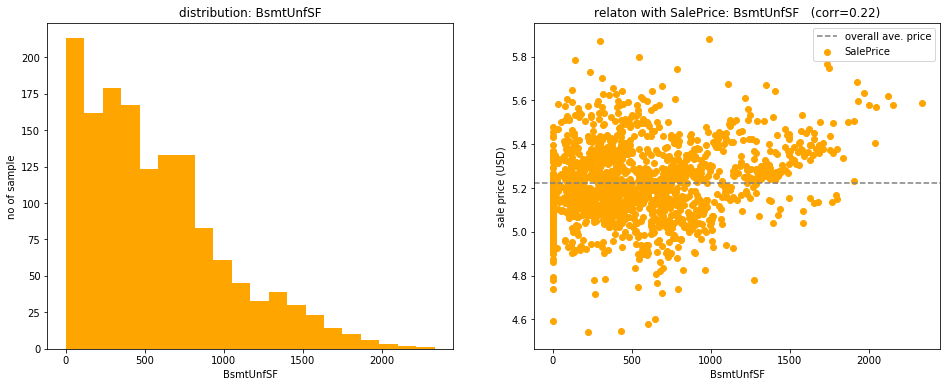

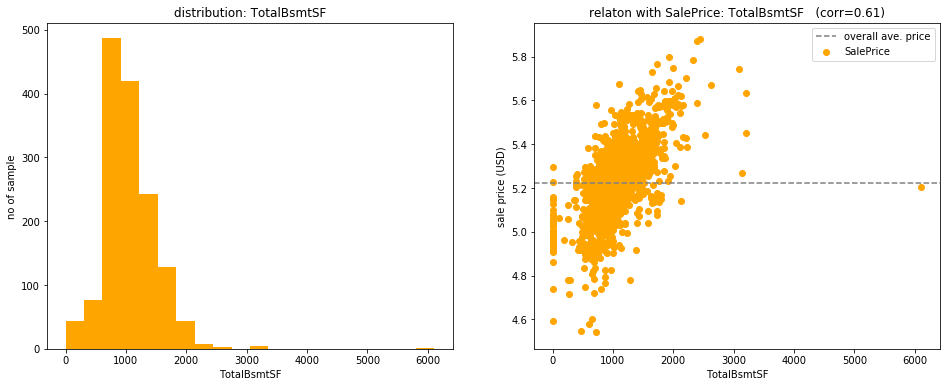

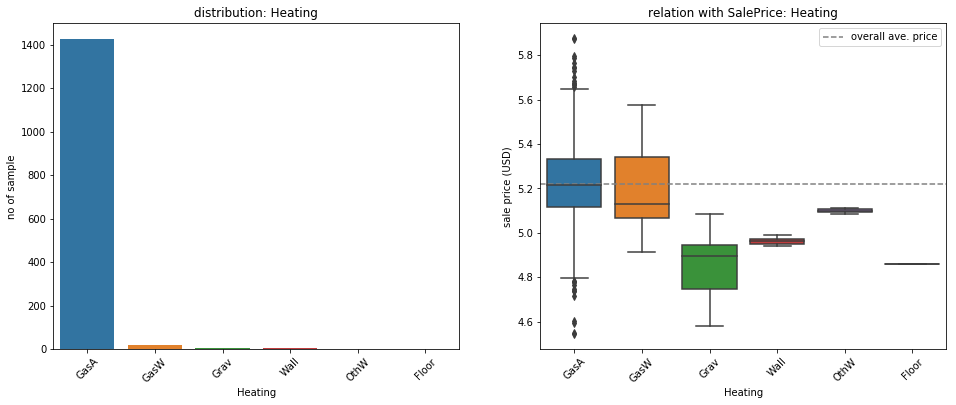

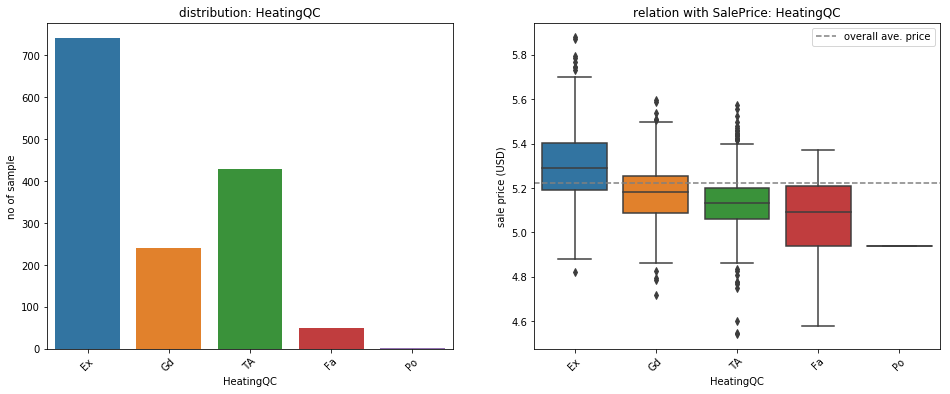

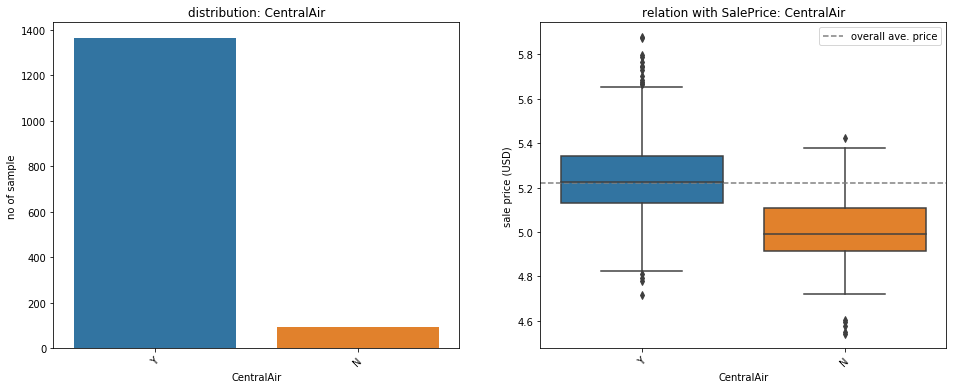

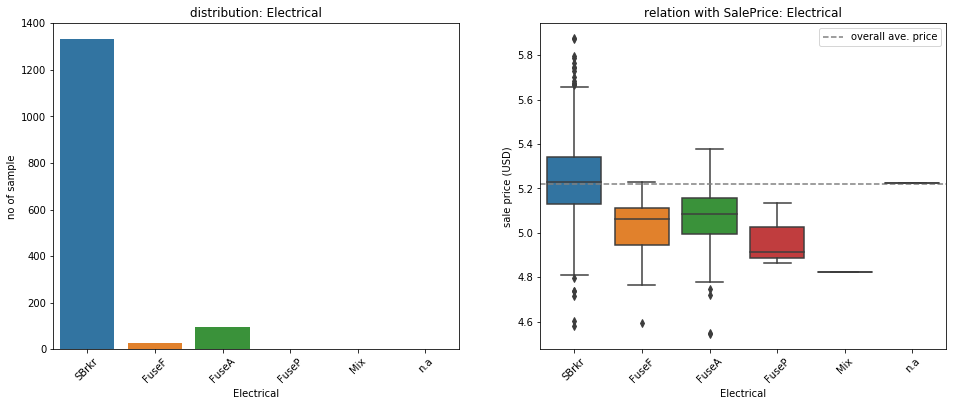

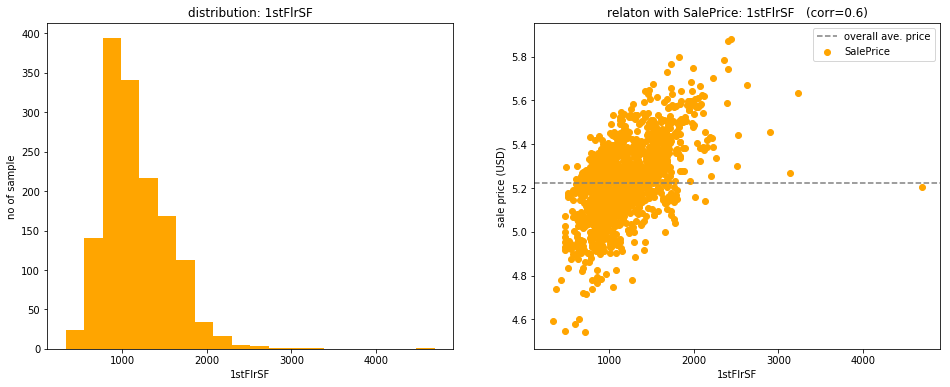

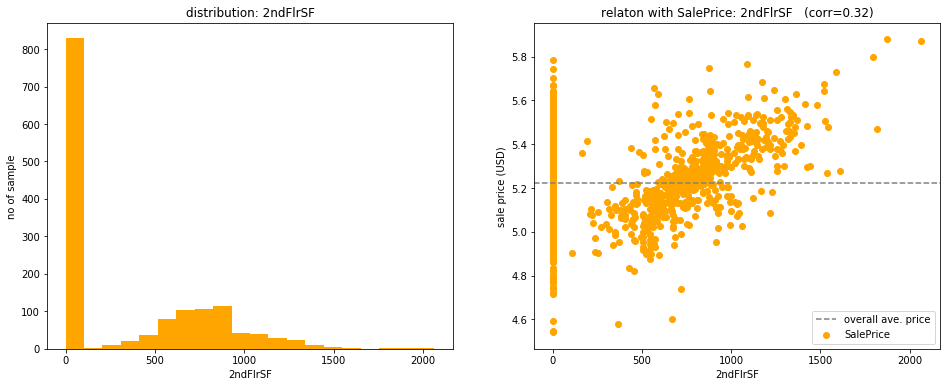

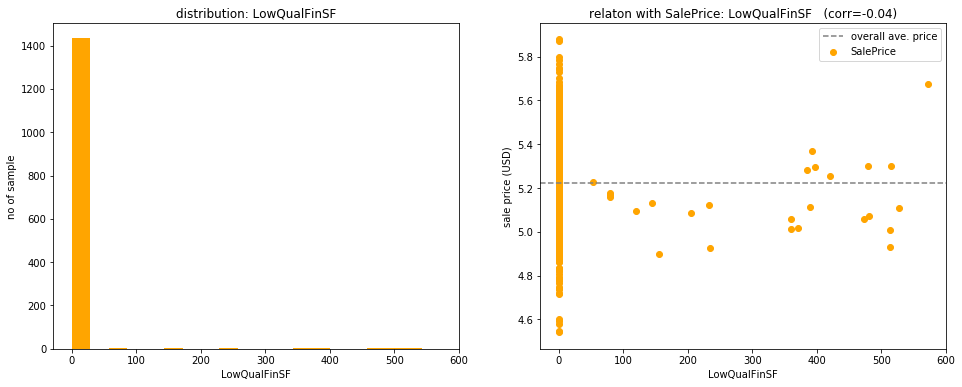

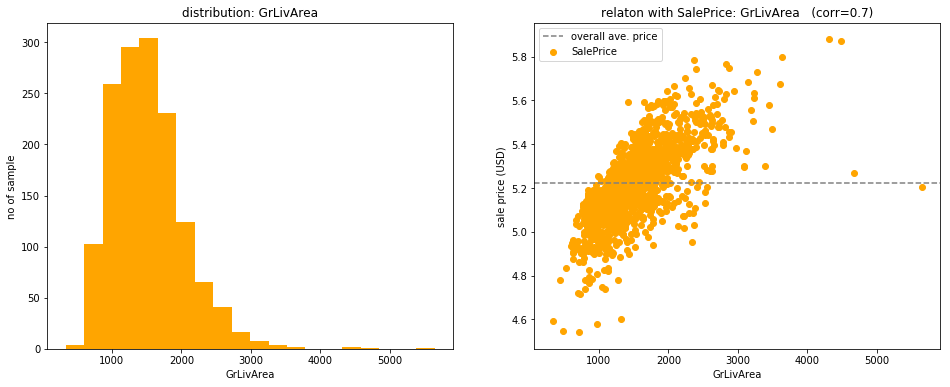

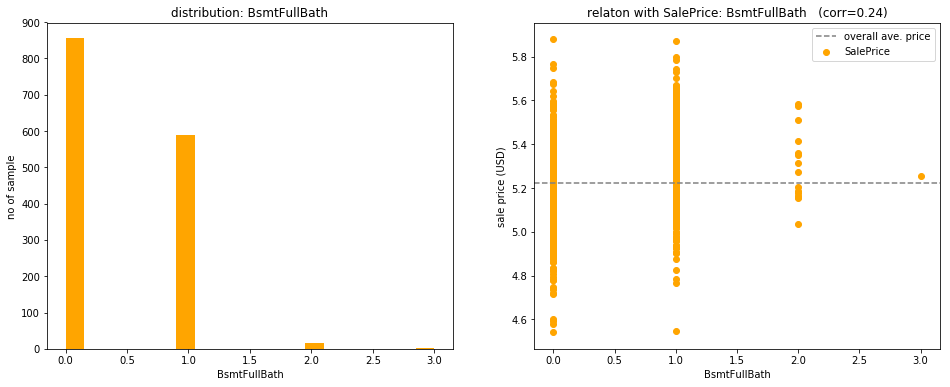

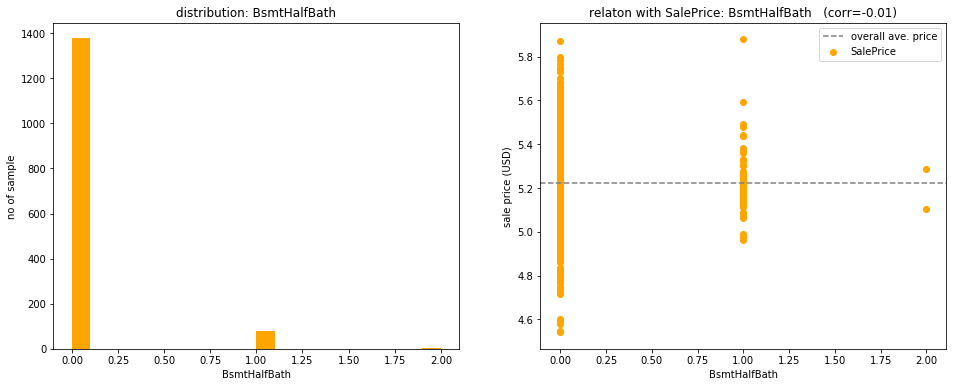

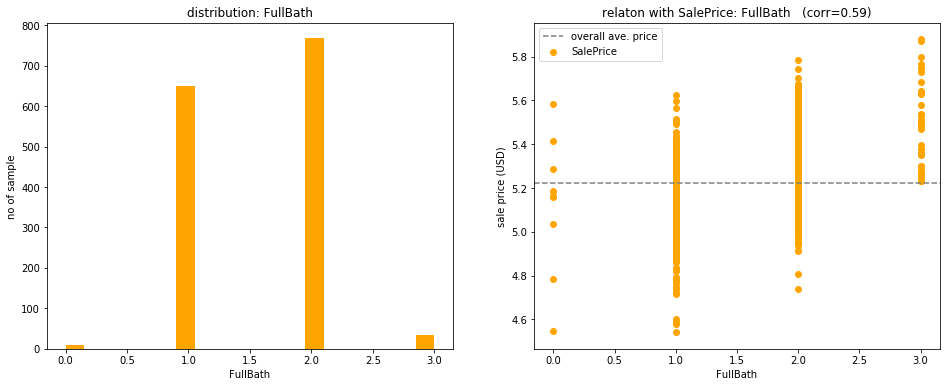

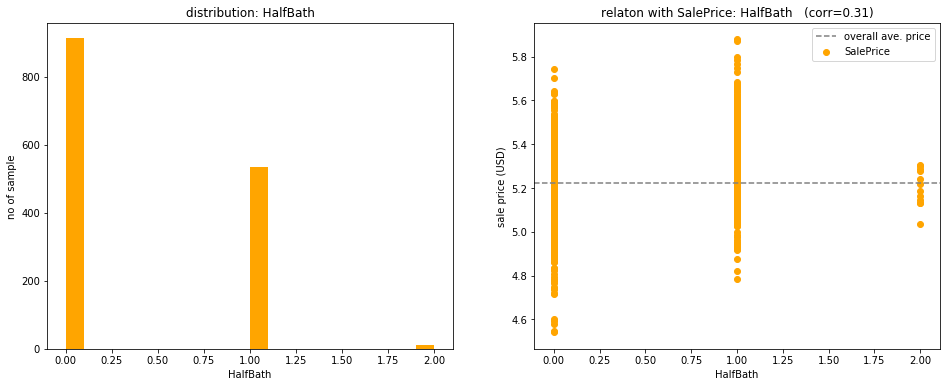

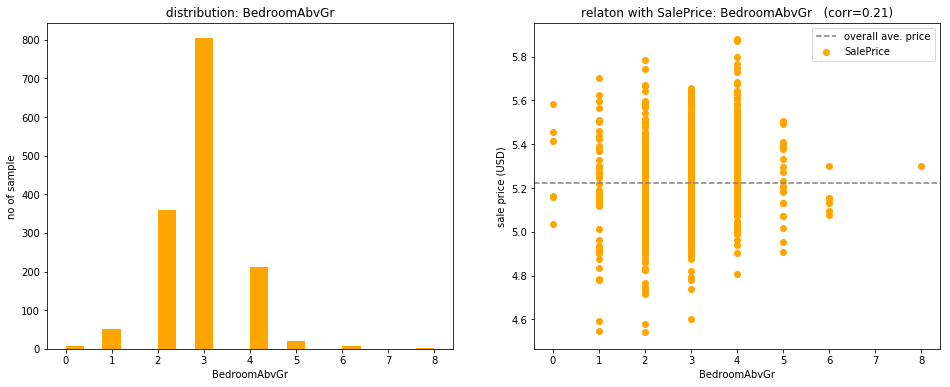

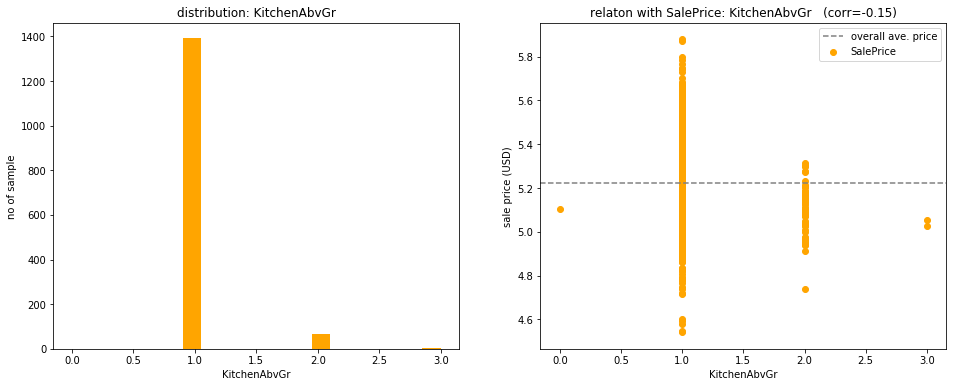

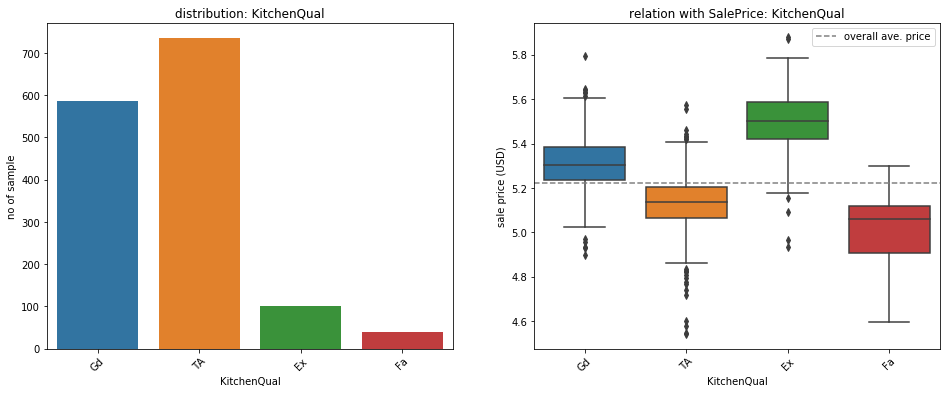

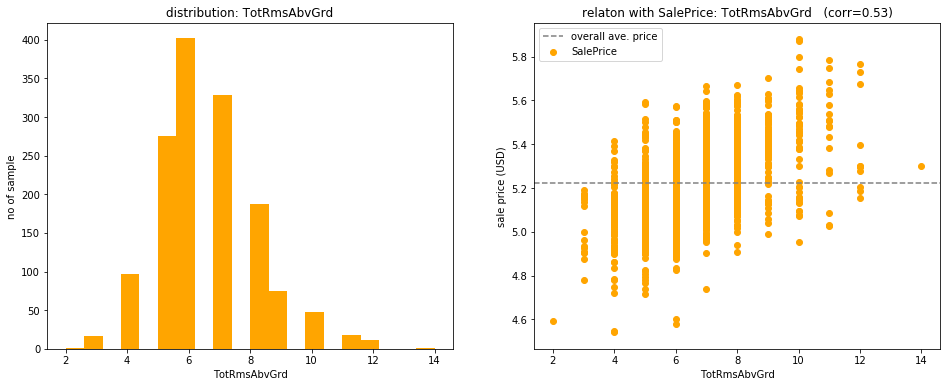

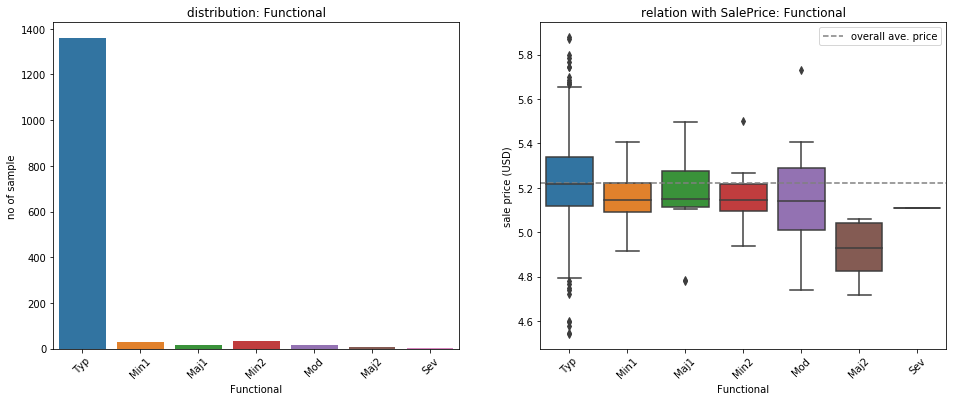

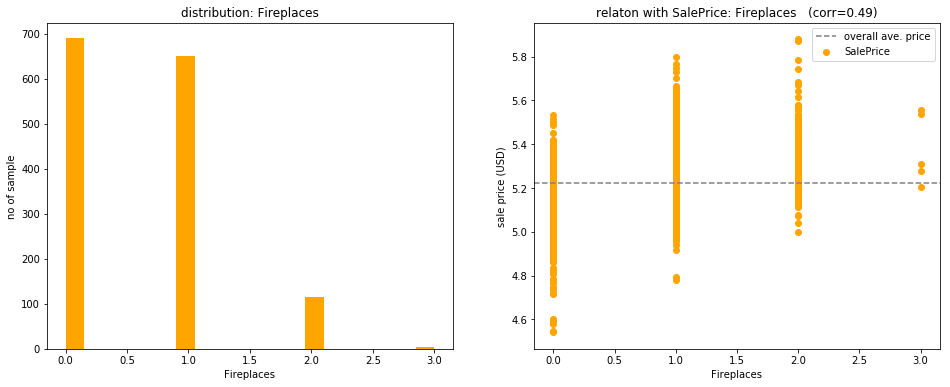

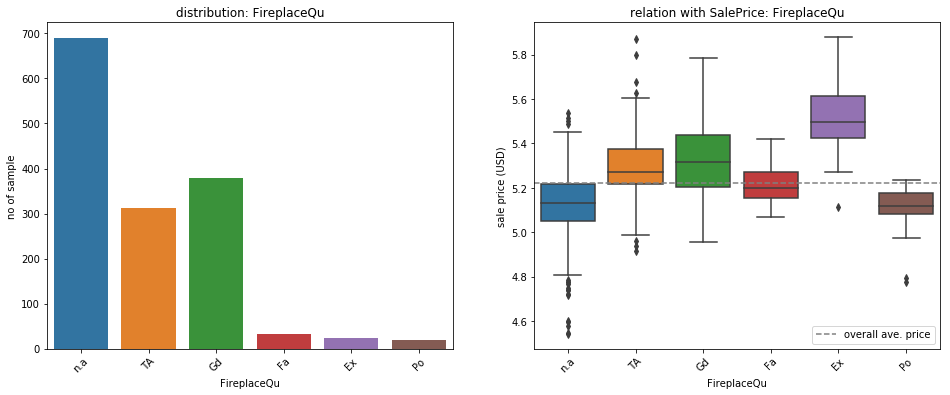

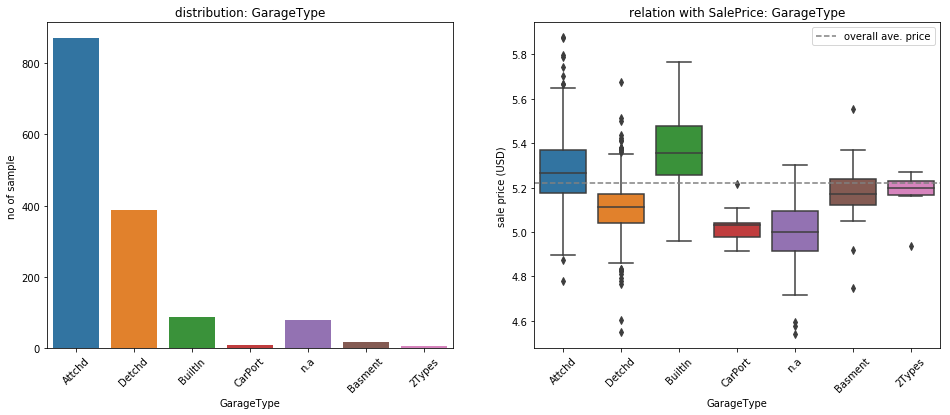

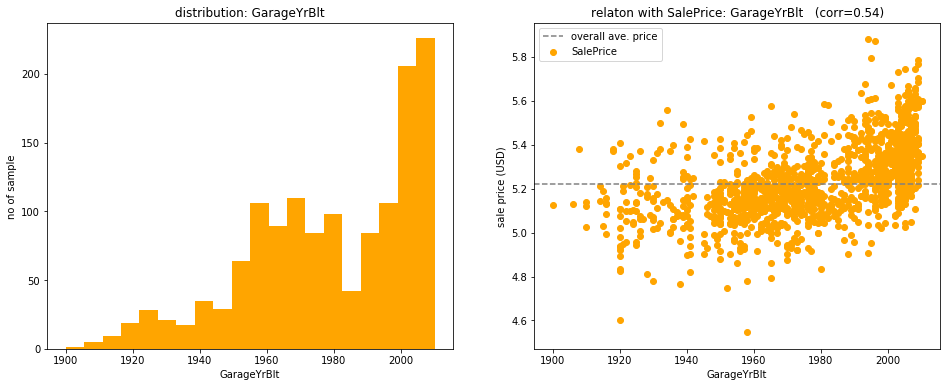

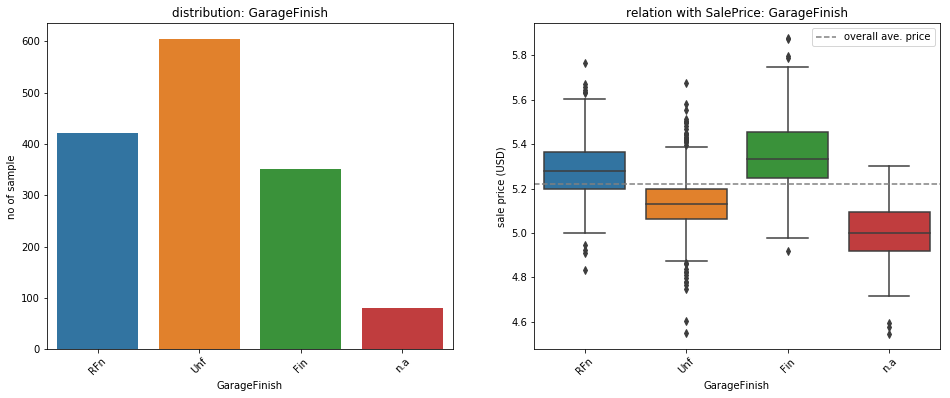

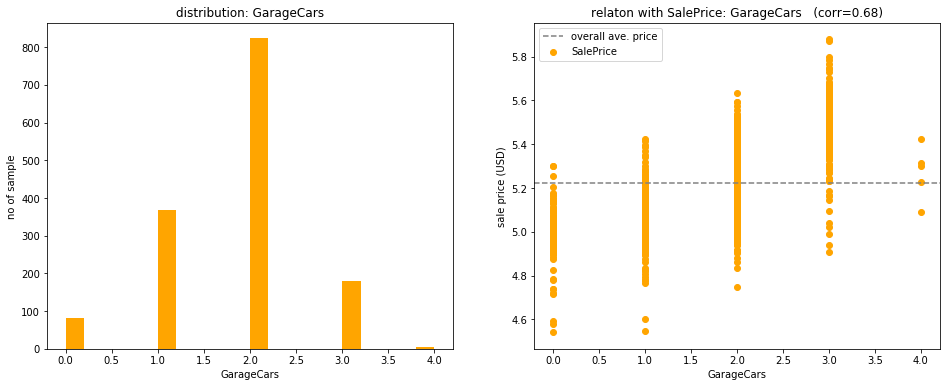

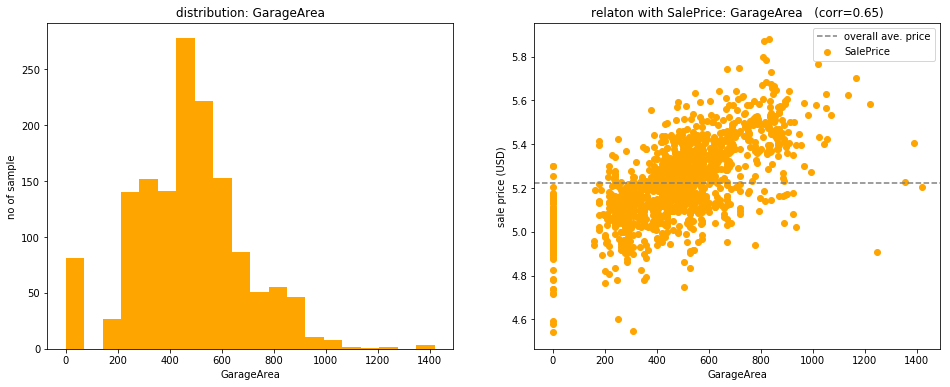

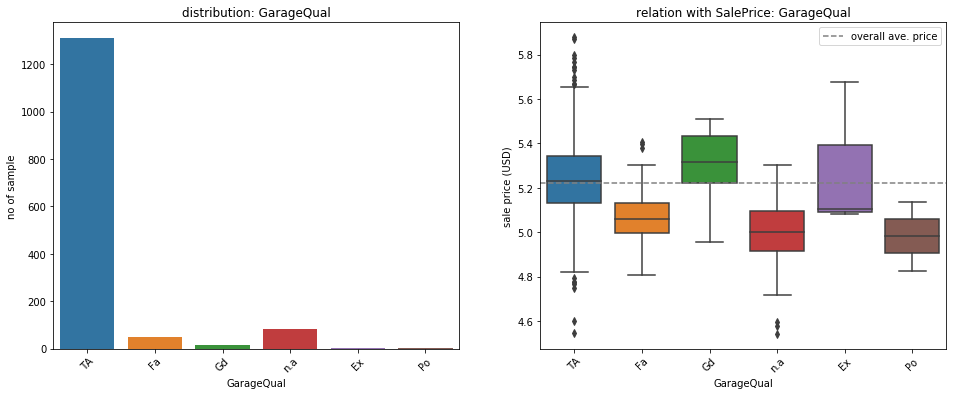

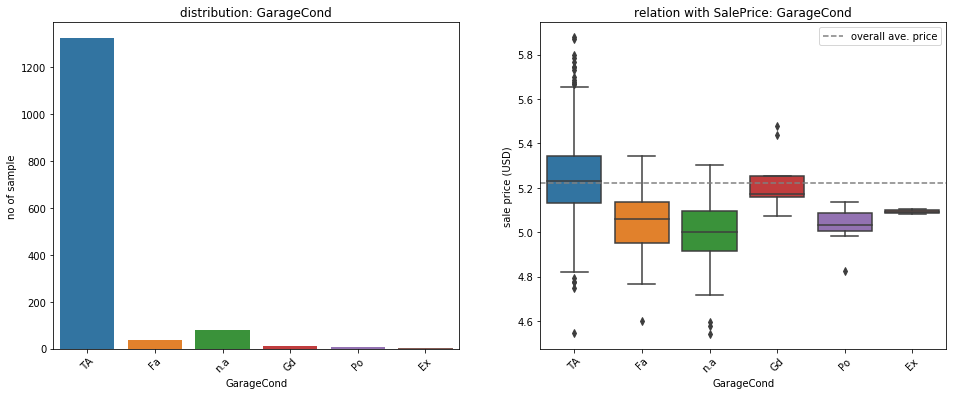

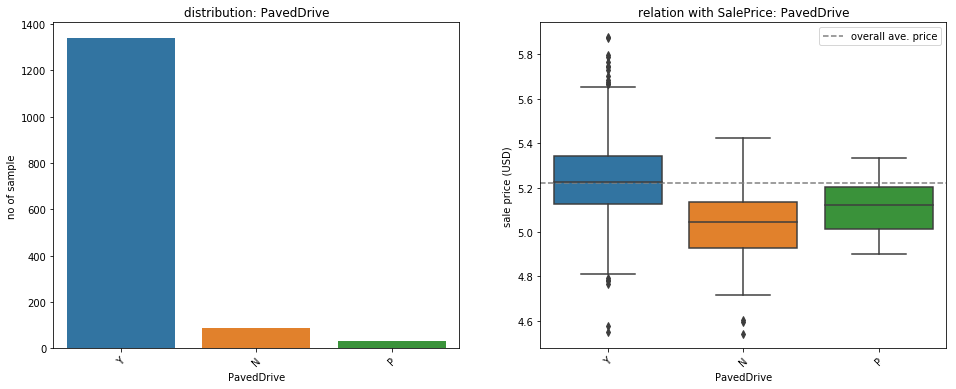

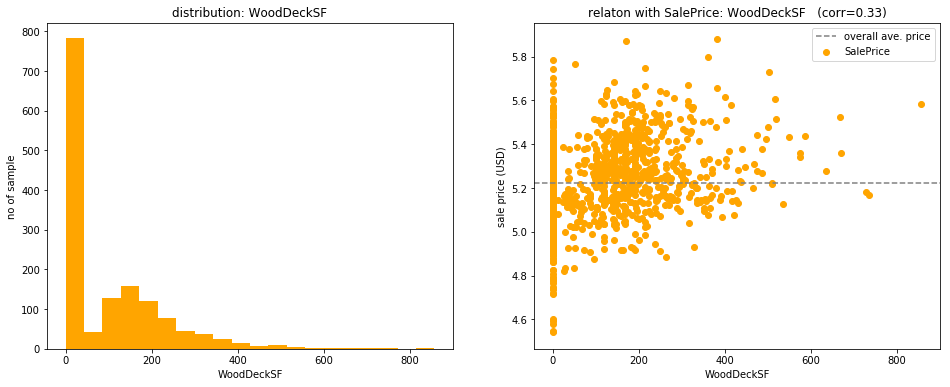

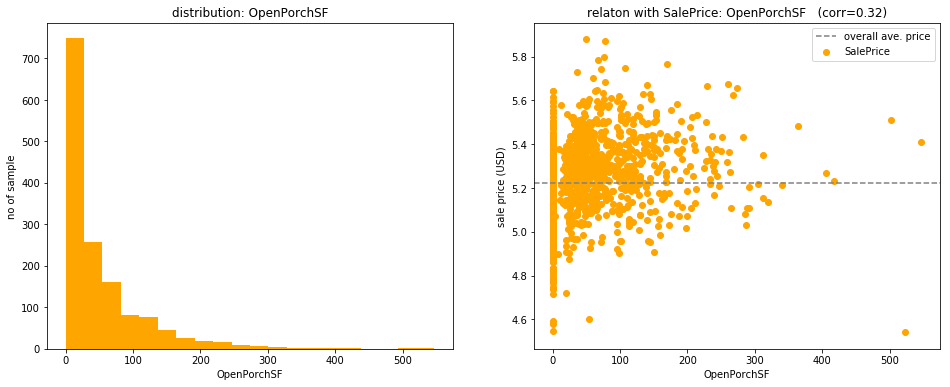

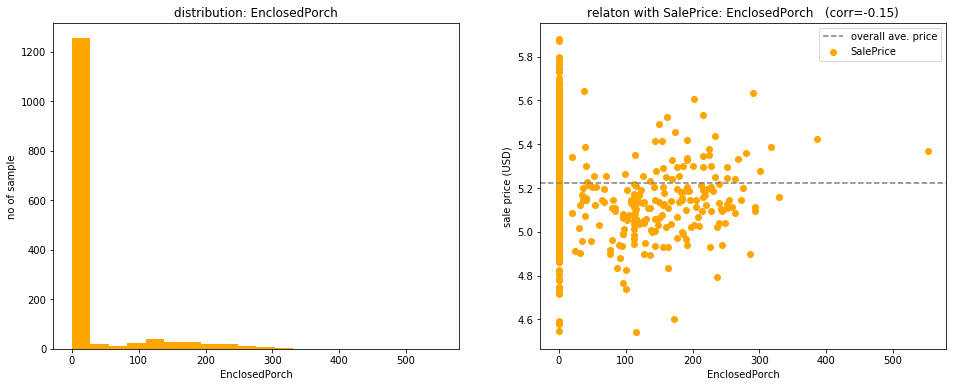

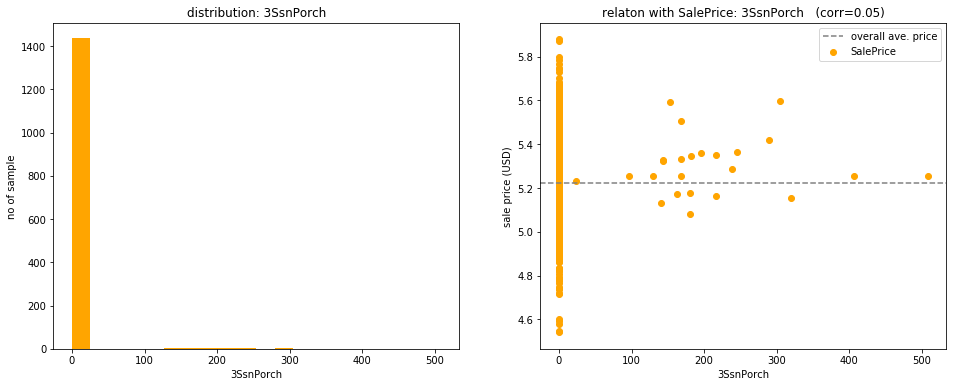

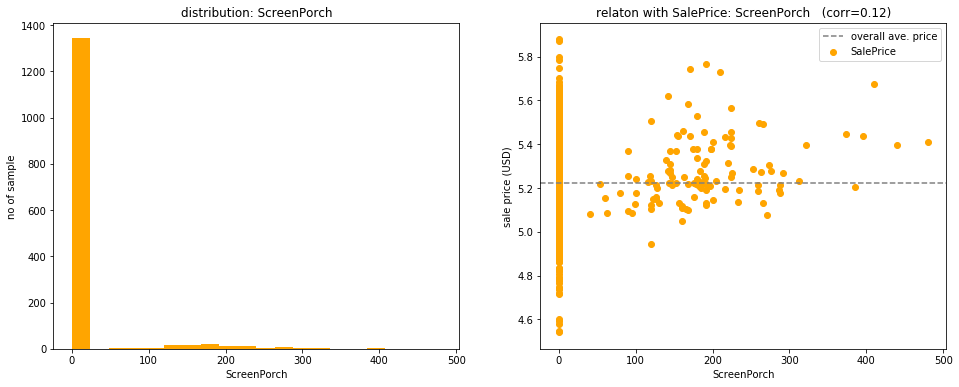

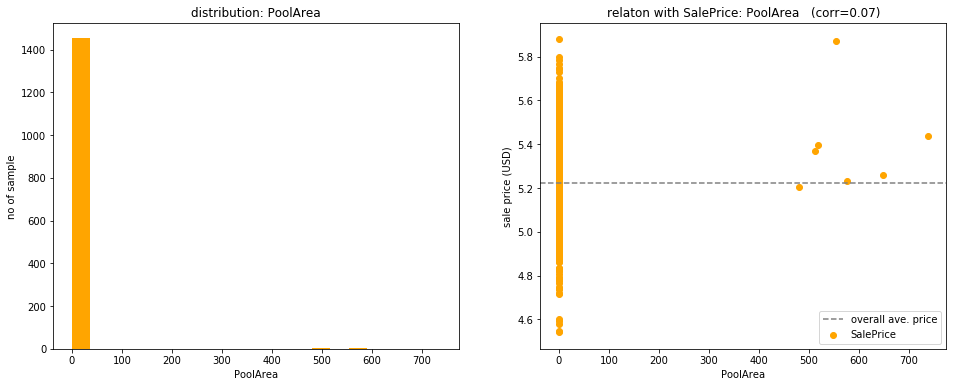

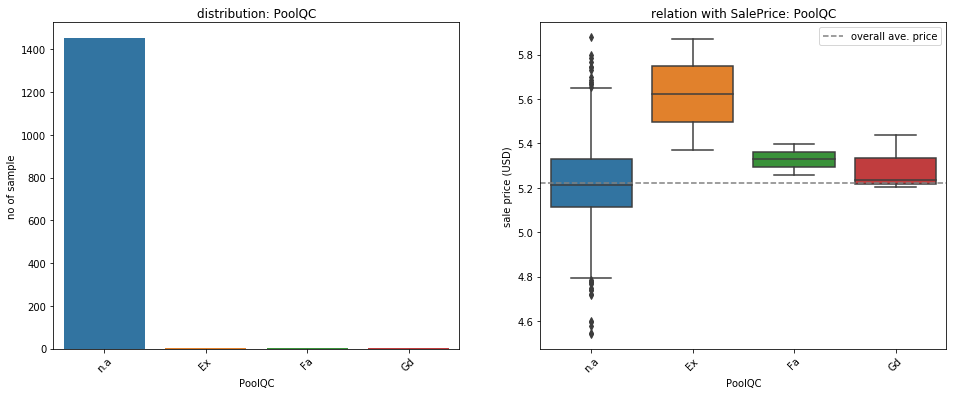

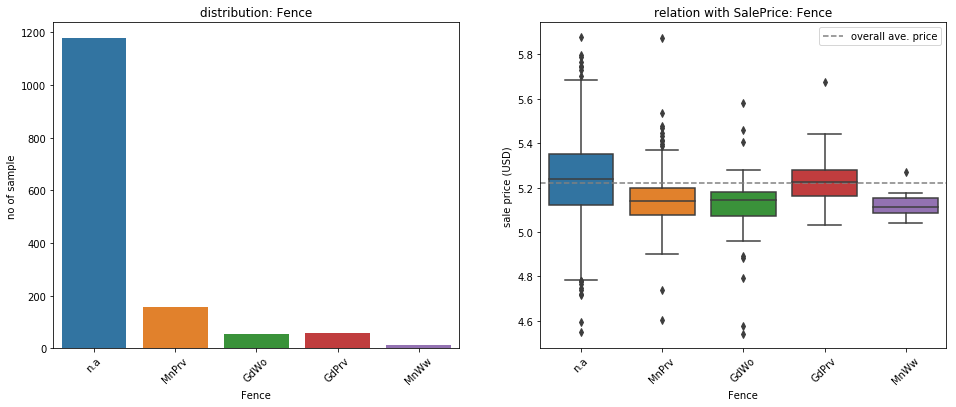

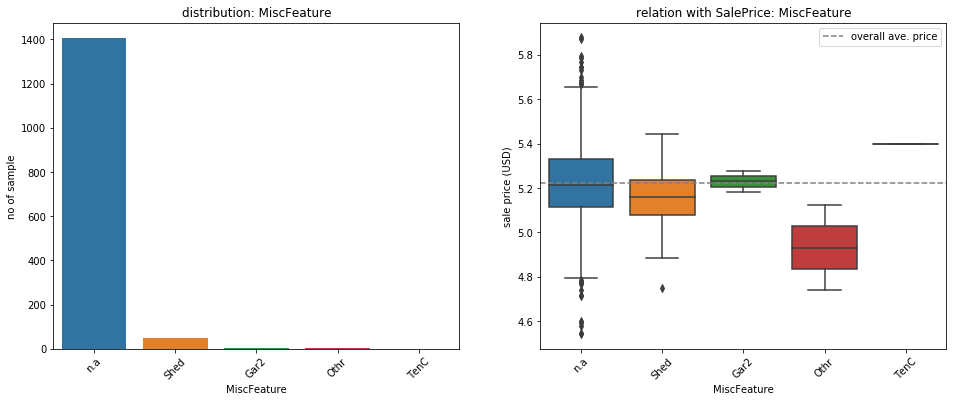

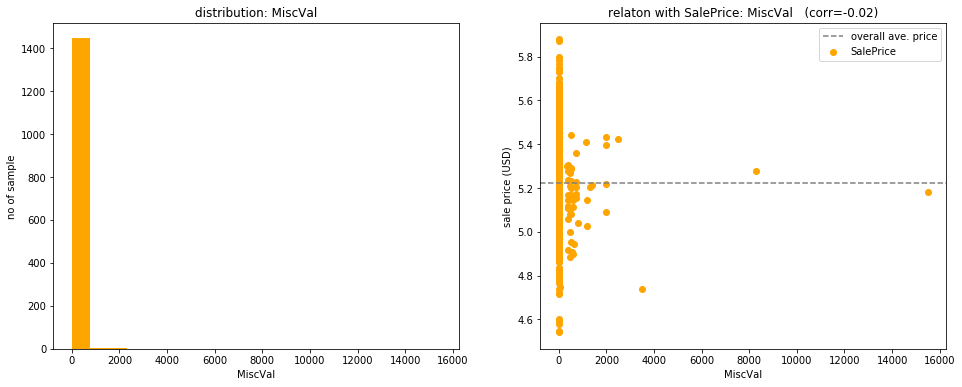

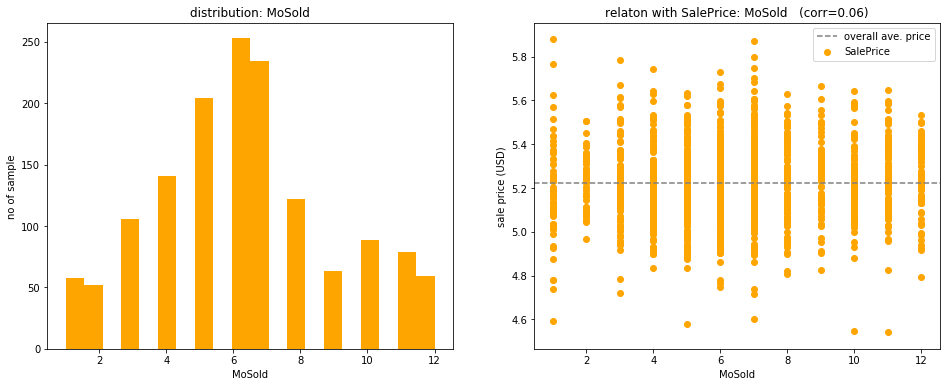

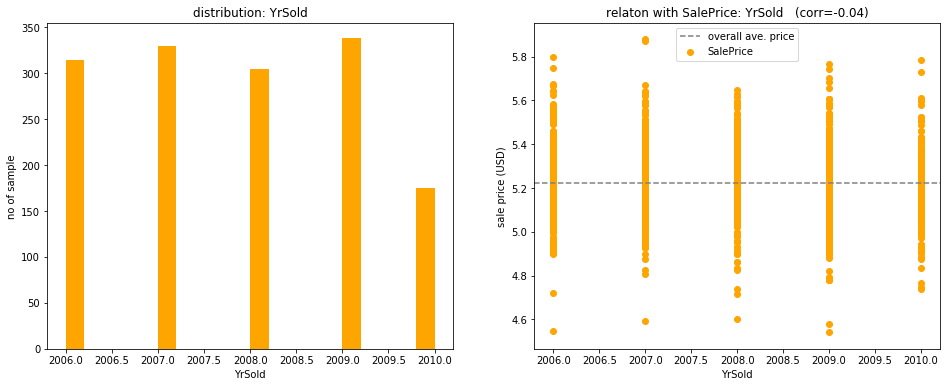

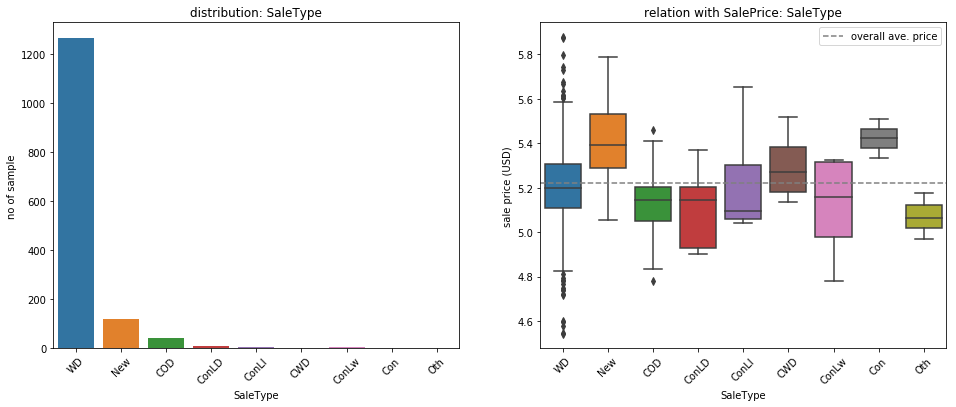

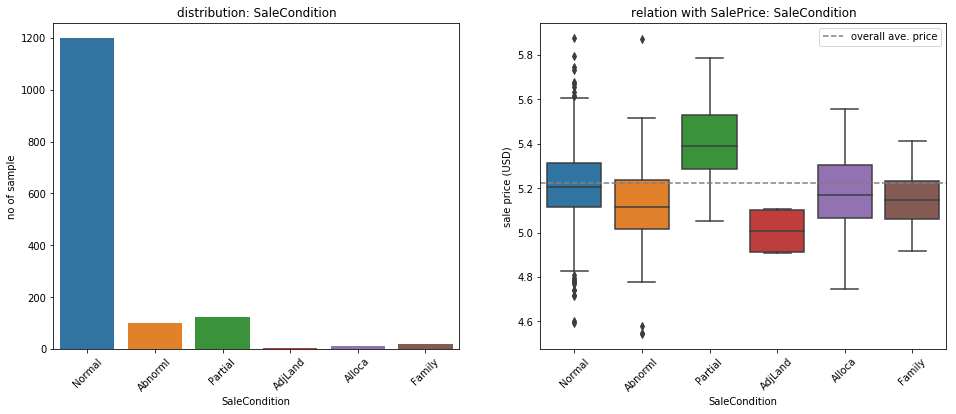

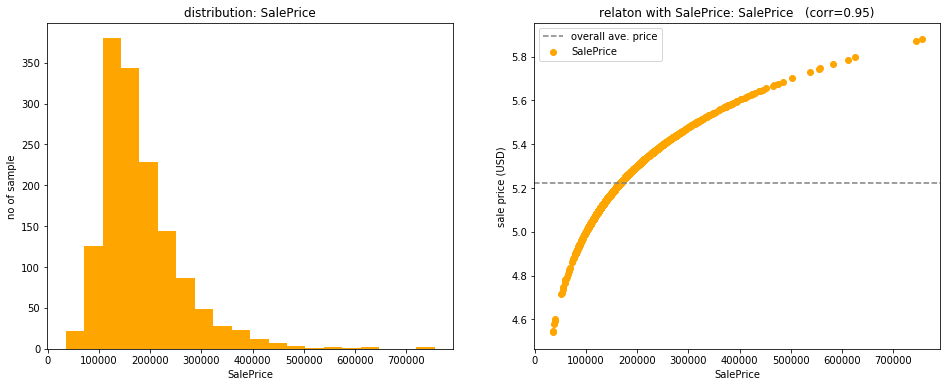

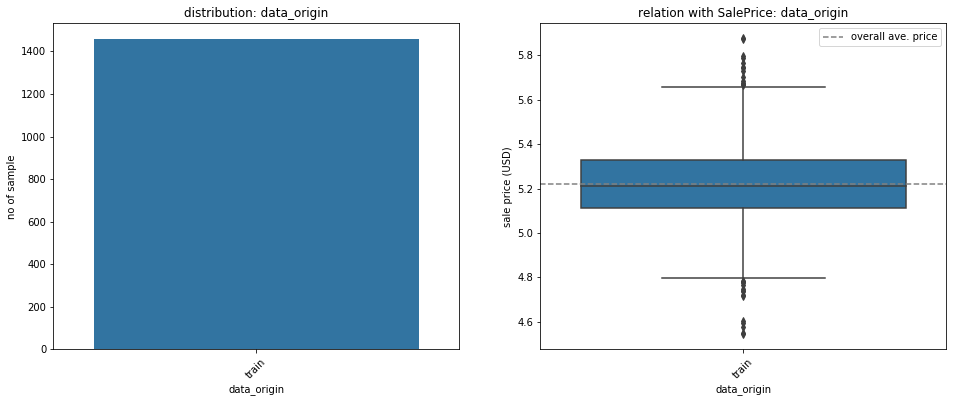

In [40]:

y_price =    np.log10(integ[integ['data_origin']=='train']['SalePrice'])
price_mean = y_price.mean()

corr_series = pd.Series([])

for column_name in integ:
    dt = integ[column_name].dtypes

    if dt == 'int64' or dt=='float64': 
        
        corr = integ[integ['data_origin']=='train'][column_name].corr(y_price).round(2)
        
        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(1,2,1)
        ax.hist(integ[integ['data_origin']=='train'][column_name], color='orange', bins = 20)
        ax.set_title('distribution: '+column_name )
        ax.set_xlabel(column_name)
        ax.set_ylabel('no of sample')
        bx = fig.add_subplot(1,2,2)
        bx.scatter(integ[integ['data_origin']=='train'][column_name], y_price,color='orange')
        bx.set_title('relaton with SalePrice: '+column_name  + '   (corr=' + str(corr) +')')
        bx.set_xlabel(column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        fig.show()
        
        corr_series.set_value(column_name, corr)
        
    if dt == 'object':
        fig = plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        ax = sns.countplot(x=integ[integ['data_origin']=='train'][column_name], data=integ[integ['data_origin']=='train'])
        ax.set_title('distribution: '+column_name)
        ax.set_ylabel('no of sample')
        plt.xticks(rotation=45)
        plt.subplot(1,2,2)
        bx = sns.boxplot(x=integ[integ['data_origin']=='train'][column_name], y=y_price)
        bx.set_title('relation with SalePrice: '+column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        plt.xticks(rotation=45)
        fig.show()

<br><br><br>
#### b) Charting collectively
<hr>

Here, first see the impact of inpact each variable to SalePrice in collective way to consider which variables to use for the predicting model.  <br>
Seeing number variables and non-number (categorical) variables separately. 
<br><br>
#### b-1) For number variables 
using correlaction with SalePrice  


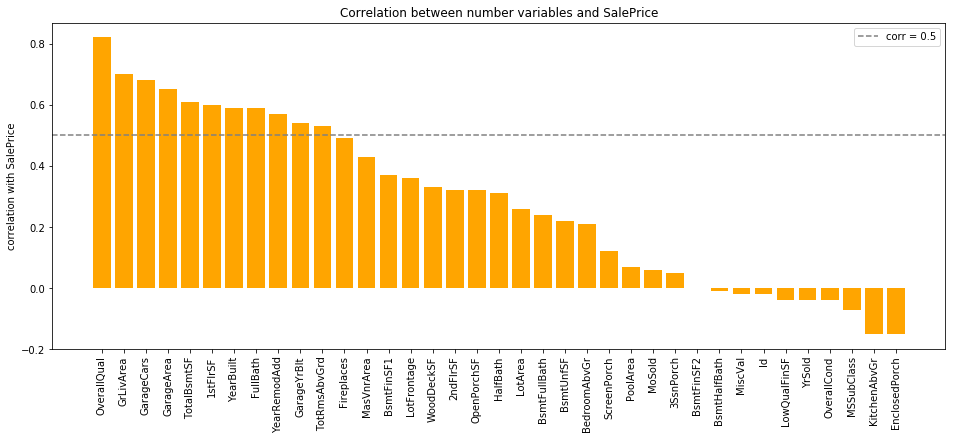

In [41]:
corr_sorted= corr_series.sort_values(ascending=False).drop('SalePrice')

fig = plt.figure(figsize=(16,6))
plt.subplot(1,1,1)
ax = plt.bar(corr_sorted.index,height=corr_sorted, color='orange')
plt.axhline(y=0.5,color= "grey" ,linestyle='--', label='corr = 0.5')
plt.title('Correlation between number variables and SalePrice')
plt.ylabel('correlation with SalePrice')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


#### b-2) For non-numerical (categorical) variables

<br><br>


In [42]:
pd_group = pd.DataFrame([]) 
min_samples_ratio = 0.05

for column_name in train_df:
    dt = train_df[column_name].dtypes
    if dt == 'object':
        
        groupCount      = train_df.groupby(column_name)['SalePrice'].count()
        groupMean       = train_df.groupby(column_name)['SalePrice'].mean()
        groupStd        = train_df.groupby(column_name)['SalePrice'].std()
        mdiff_div_std   = (groupMean- price_mean)/groupStd
        groupIndex      = column_name +'-->' +groupCount.index
        con = pd.concat([mdiff_div_std, groupCount],axis =1)
        con.columns = ['mdiff_div_std','count']
        con.index   = column_name + '->' +  con.index 
        pd_group = pd.concat([pd_group,con])

pd_group['abs_mdiff_div_std'] = np.abs(pd_group['mdiff_div_std'] )
        
pd_group.head()

mdiff_div_std  count  abs_mdiff_div_std
MSZoning->C (all)       2.205397     10           2.205397
MSZoning->FV            4.086504     65           4.086504
MSZoning->RH            3.683506     16           3.683506
MSZoning->RL            2.364844   1151           2.364844
MSZoning->RM            2.603199    218           2.603199

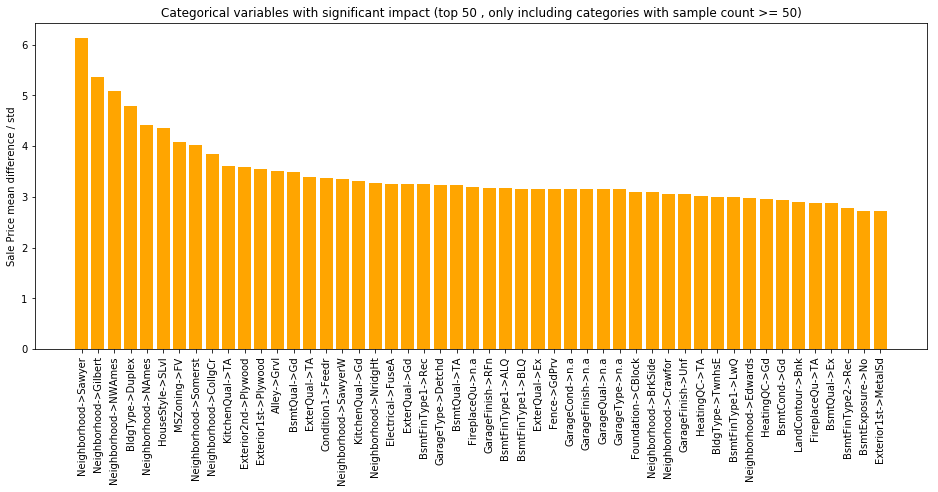

In [19]:
num_of_bars = 50
min_count   = 50 

meandiff_sorted = pd_group[pd_group['count']>=min_count].sort_values(by='abs_mdiff_div_std', ascending=False)[:num_of_bars]

fig = plt.figure(figsize=(16,6))
plt.subplot(1,1,1)
ax = plt.bar(meandiff_sorted.index,height=meandiff_sorted['abs_mdiff_div_std'], color='orange')
plt.title('Categorical variables with significant impact (top %s , only including categories with sample count >= %s)' % (num_of_bars, min_count))
plt.ylabel('Sale Price mean difference / std')
plt.xticks(rotation='vertical')

plt.show()


# Step 3 : Adding/Processing variables (features) of the dataset 
<hr>

## Processing variables
<hr>

Categorical variables(features) into "1 or 0" variables so that the model can recognize

<br>


In [48]:
dummies = pd.get_dummies(integ)

Then, changing from categorical variables to numeric variables

In [51]:
c_to_n = pd.DataFrame()

c_to_n['GarageQual_N']    = integ['GarageQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['GarageCond_N']    = integ['GarageCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['PoolQC_N']        = integ['PoolQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['ExterQual_N']     = integ['ExterQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['ExterCond_N']     = integ['ExterCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['BsmtQual_N']      = integ['BsmtQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['BsmtCond_N']      = integ['BsmtCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['HeatingQC_N']     = integ['HeatingQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['KitchenQual_N']   = integ['KitchenQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['FireplaceQu_N']   = integ['FireplaceQu'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
c_to_n['PavedDrive_N']    = integ['PavedDrive'].apply(lambda x: 2 if x=='Y' else 1 if x=='P' else 0)
c_to_n['GarageFinishe_N'] = integ['GarageFinish'].apply(lambda x: 3 if x=='Fin' else 2 if x=='RFn' else 1 if x == 'Unf'  else 0)
c_to_n['LotShape_N']      = integ['LotShape'].apply(lambda x: 3 if x=='IR3' else 2 if x=='IR2' else 1 if x == 'IR1'  else 0)


Do in opposite way, from numeric to categorical

In [66]:
n_to_c = pd.DataFrame()

n_to_c['WoodDeckSF_C']     = integ['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['OpenPorchSF_C']    = integ['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['EnclosedPorch_C']  = integ['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['PoolArea_C']       = integ['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['GarageArea_C']     = integ['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['2ndFlrSF_C']       = integ['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['BsmtFinSF1_C']     = integ['BsmtFinSF1'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['MasVnrArea_C']     = integ['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
n_to_c['YearRemodAdd_C']   = integ['YearRemodAdd'].apply(lambda x: 1 if x == 1950 else 0)


Combination of features

In [89]:
combi = pd.DataFrame()

combi['1st2ndFlrSF']       = integ['1stFlrSF'] + integ['2ndFlrSF']
combi['ageAtSold']         = integ.loc[:,'YrSold'] - integ.loc[:,'YearRemodAdd']
combi['MoYrSold']          = integ['YrSold'].astype(str)+((integ['MoSold']+2)//3).astype(str).apply(lambda x: x.zfill(2))


Chaning the dimension of each feature

In [84]:
c_dim = pd.DataFrame()

c_dim['log_GrLivArea']        = np.log10(integ['GrLivArea']+1)
c_dim['log_TotRmsAbvGrd']     = np.log10(integ['TotRmsAbvGrd']+1)
c_dim['log_Fireplaces']       = np.log10(integ['Fireplaces']+1)
c_dim['log_OverallCond']      = np.log10(integ['OverallCond']+1)
c_dim['log_TotalBsmtSF']      = np.log10(integ['TotalBsmtSF']+1)
c_dim['log_LotFrontage']      = np.log10(integ['LotFrontage']+1)
c_dim['log_LotArea']          = np.log10(integ['LotArea']+1)
c_dim['log_MasVnrArea']       = np.log10(integ['MasVnrArea']+1)
c_dim['log_GarageArea']       = np.log10(integ['GarageArea']+1)

c_dim['log_1st2ndFlrSF']      = np.log10(combi['1st2ndFlrSF']+1)

c_dim['squa_YearBuilt']       = (integ['YearBuilt']-1900)**2
c_dim['squa_GarageYrBlt']     = (integ['GarageYrBlt']-1900)**2
c_dim['squa_FireplaceQu']     = (c_to_n['FireplaceQu_N'])**2
c_dim['squa_BsmtQual']        = (c_to_n['BsmtQual_N'] )**2
c_dim['squa_GarageCars']      = (integ['GarageCars'] )**2

Seeing the modified variables (fetures) to see on charts

In [149]:
# integrating all the new features
newFeatures = pd.concat([c_to_n,n_to_c],axis=1)
newFeatures = pd.concat([newFeatures,combi],axis=1)
newFeatures = pd.concat([newFeatures,c_dim],axis=1)
newFeatures = pd.concat([newFeatures,integ[['SalePrice','data_origin']]],axis=1)
newFeatures.head()

newFeatures_test = newFeatures[newFeatures['data_origin']=='train']
newFeatures_test.head()

GarageQual_N  GarageCond_N  PoolQC_N  ExterQual_N  ExterCond_N  BsmtQual_N  \
0             3             3         0            4            3           4   
1             3             3         0            3            3           4   
2             3             3         0            4            3           4   
3             3             3         0            3            3           3   
4             3             3         0            4            3           4   

   BsmtCond_N  HeatingQC_N  KitchenQual_N  FireplaceQu_N     ...       \
0           3            5              4              0     ...        
1           3            5              3              3     ...        
2           3            5              4              3     ...        
3           4            4              4              4     ...        
4           3            5              4              3     ...        

   log_MasVnrArea  log_GarageArea  log_1st2ndFlrSF  squa_YearBuilt  \
0        2.294466        2.739572         3.233250           10609   
1        0.000000        2.663701         3.101403            5776   
2        2.212188        2.784617         3.252125           10201   
3        0.000000        2.808211         3.235023             225   
4        2.545307        2.922725         3.342225           10000   

   squa_GarageYrBlt  squa_FireplaceQu  squa_BsmtQual  squa_GarageCars  \
0           10609.0                 0             16              4.0   
1            5776.0                 9             16              4.0   
2           10201.0                 9             16              4.0   
3            9604.0                16              9              9.0   
4           10000.0                 9             16              9.0   

   SalePrice  data_origin  
0   208500.0        train  
1   181500.0        train  
2   223500.0        train  
3   140000.0        train  
4   250000.0        train  

[5 rows x 42 columns]

d:\y-data\venv\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\y-data\venv\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\y-data\venv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: inval

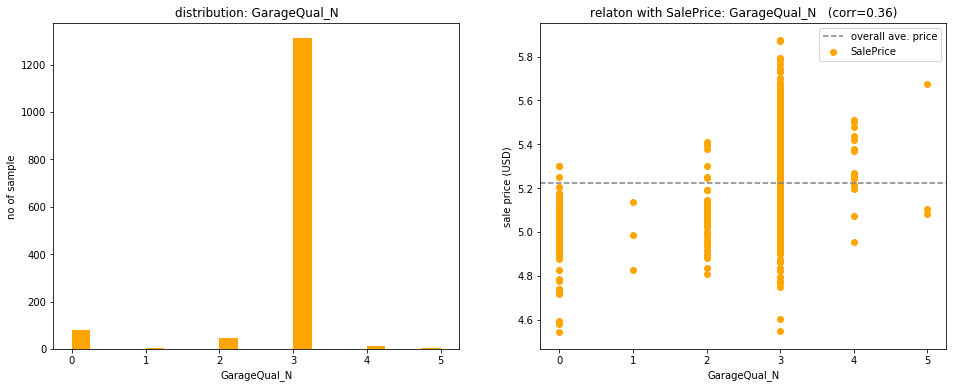

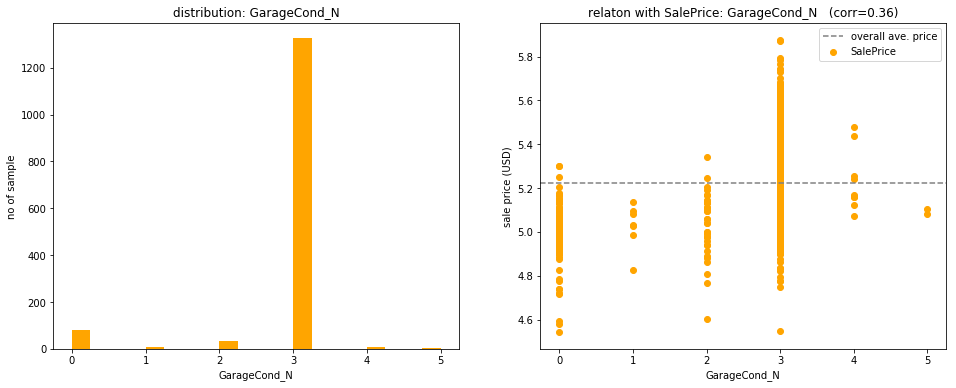

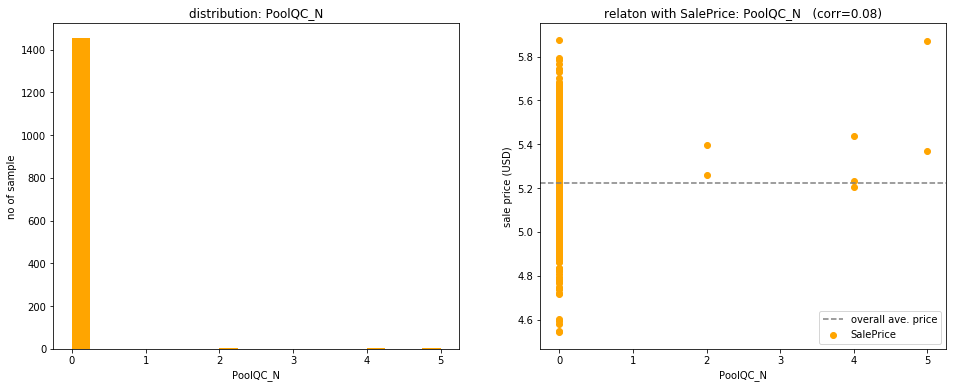

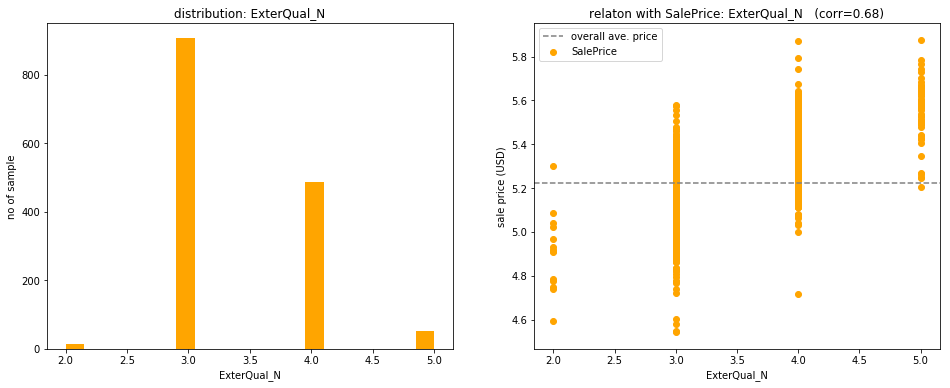

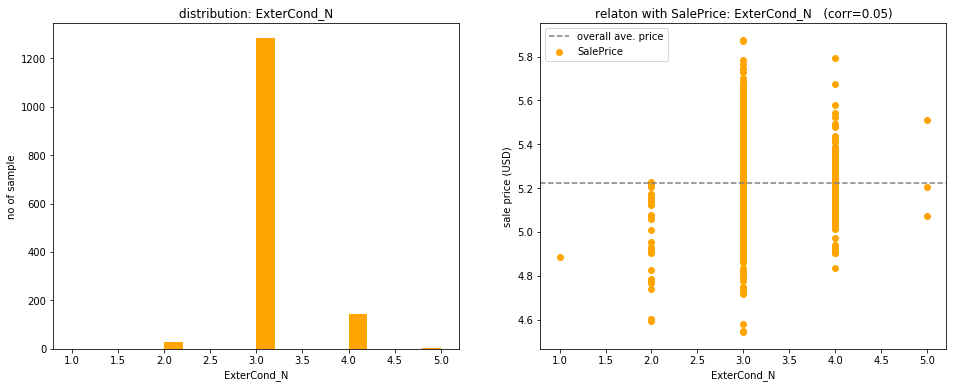

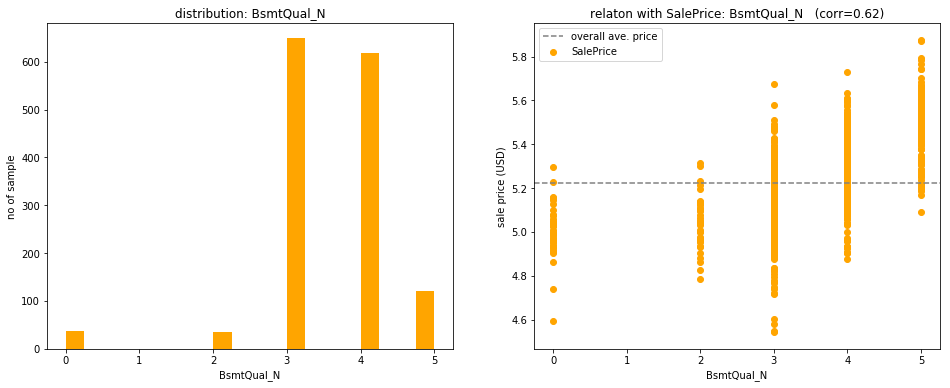

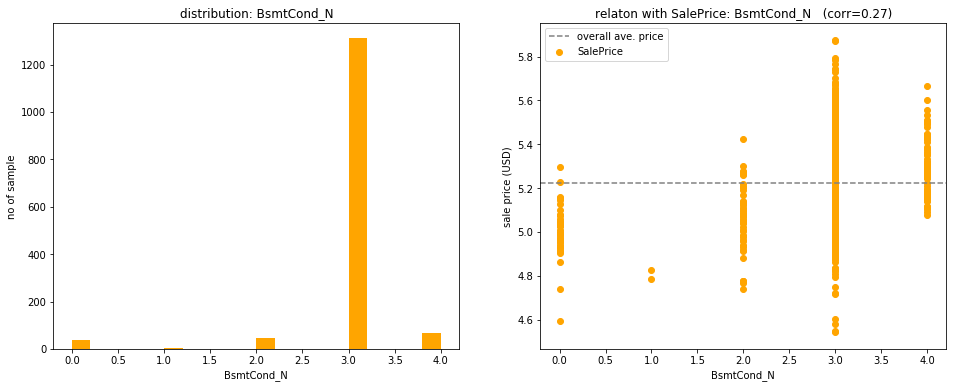

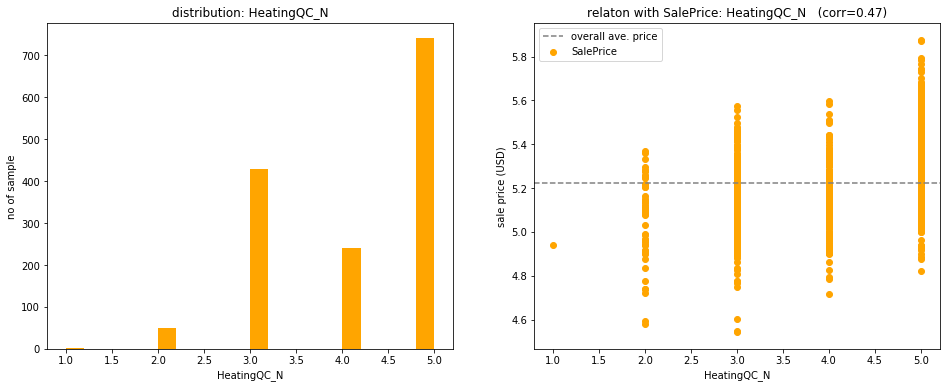

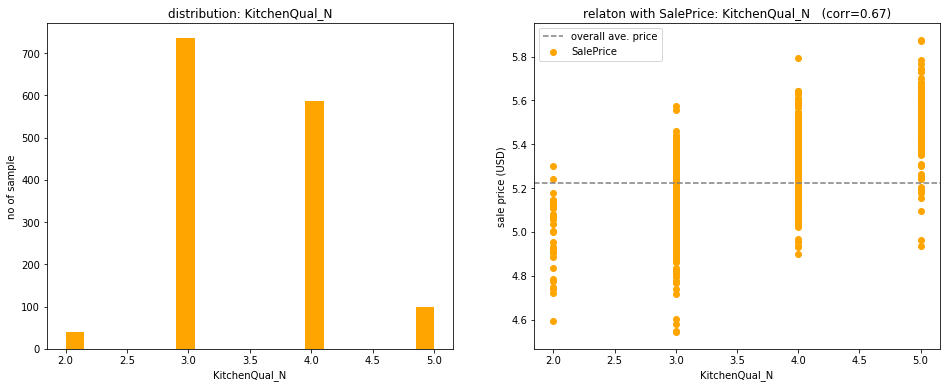

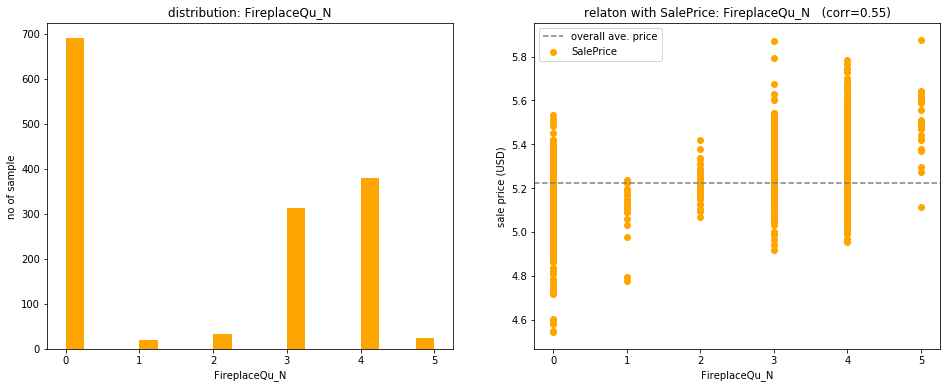

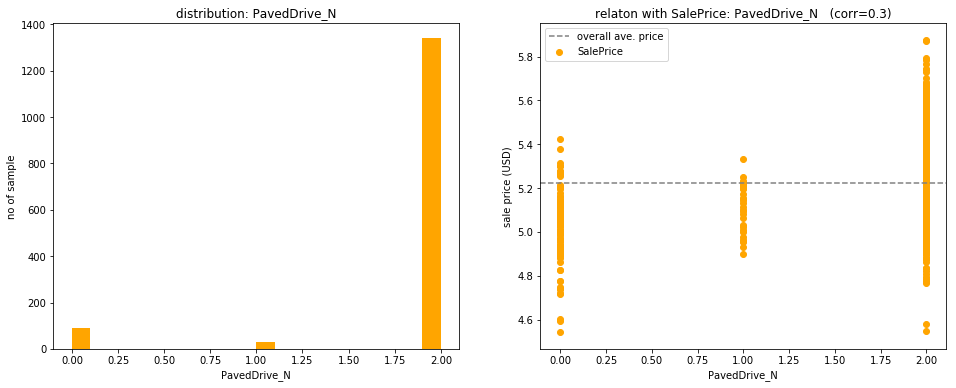

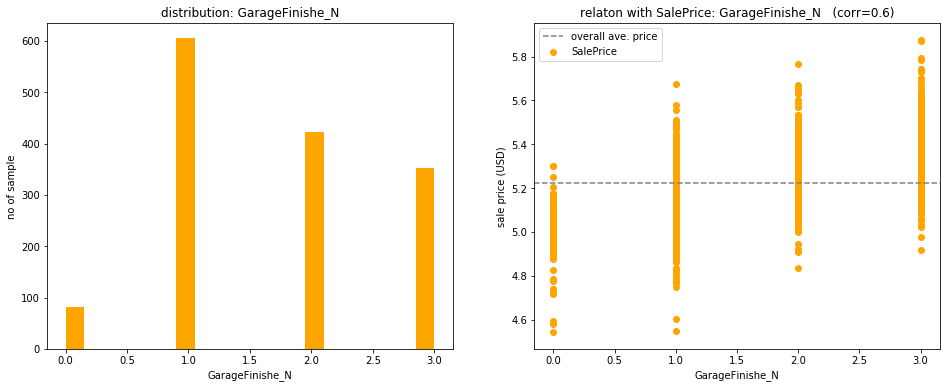

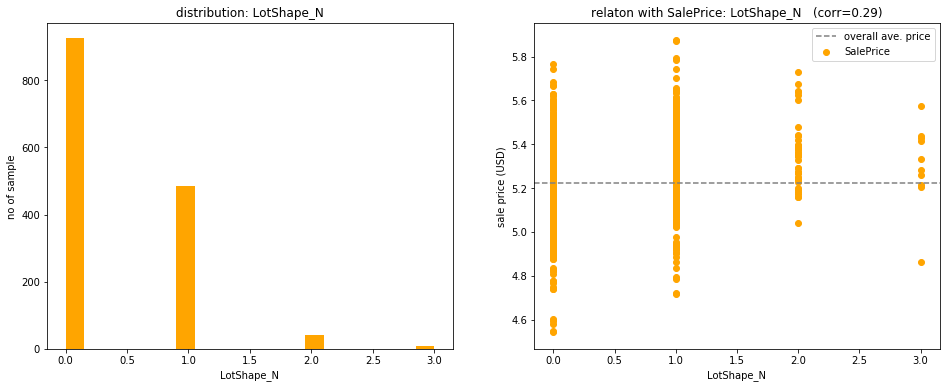

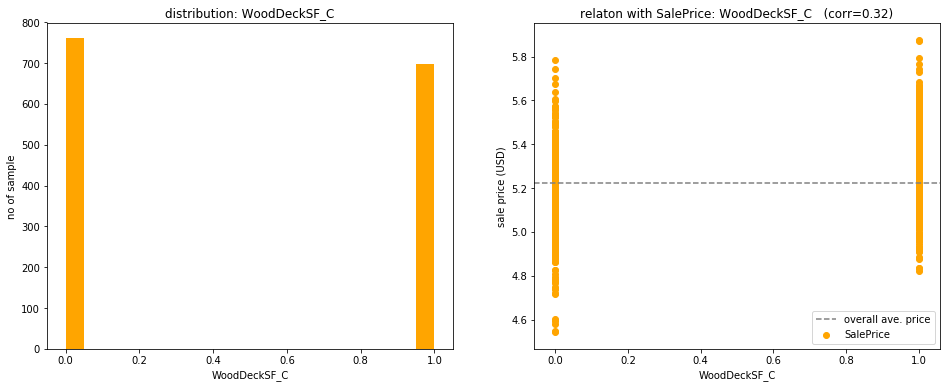

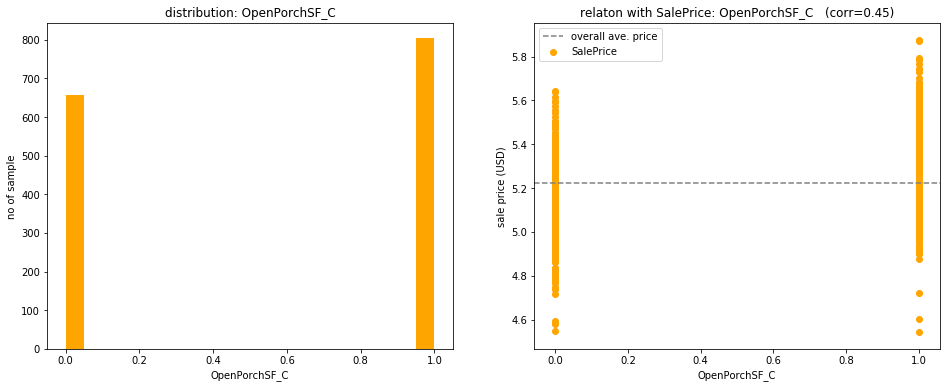

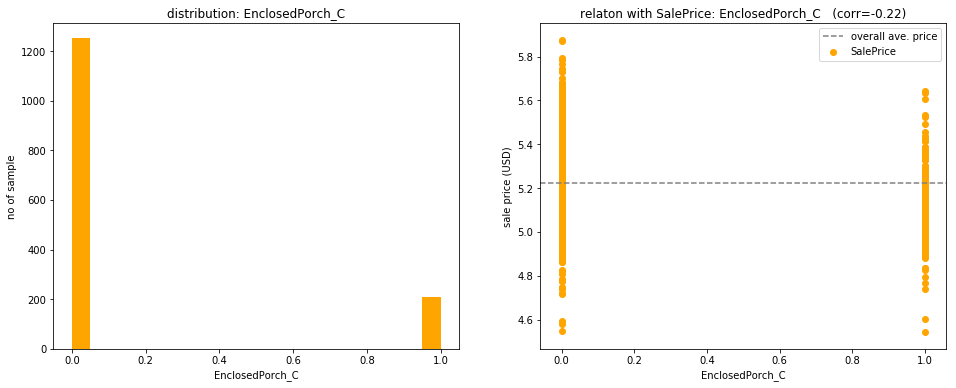

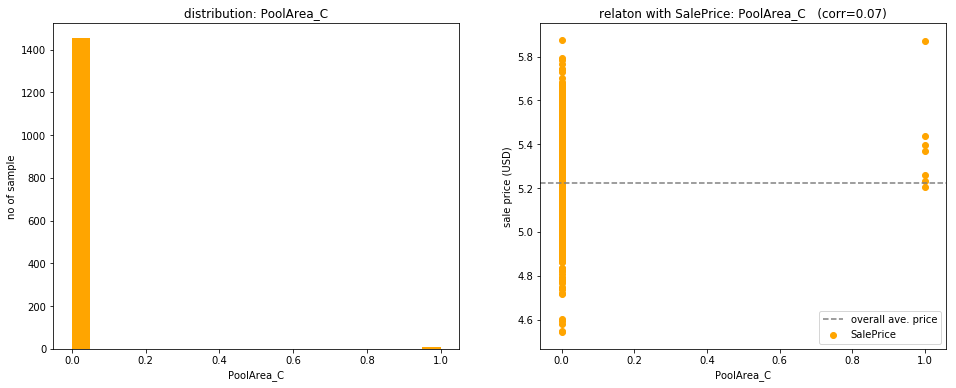

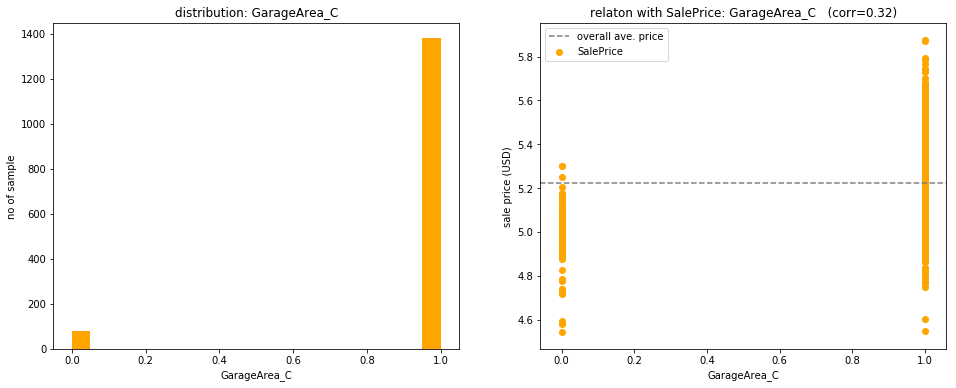

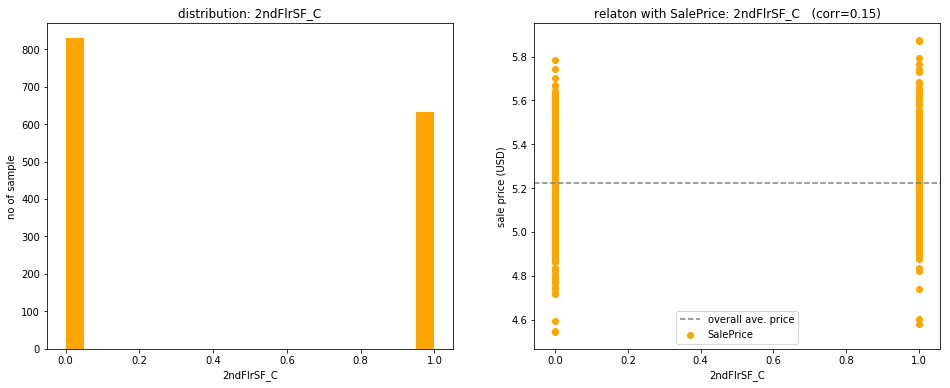

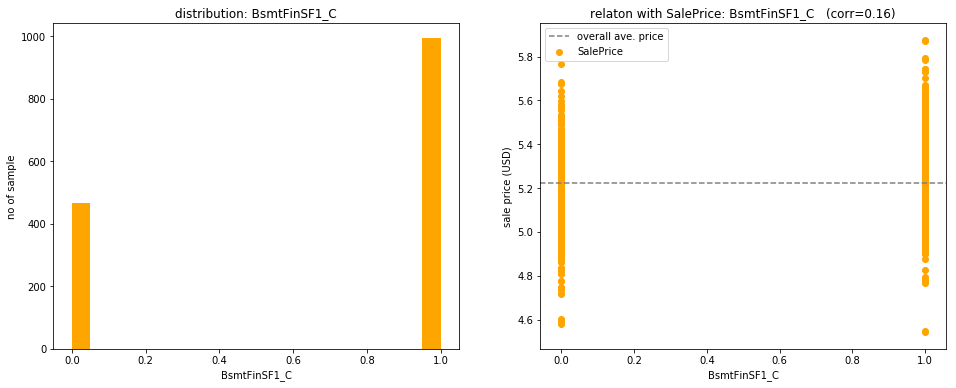

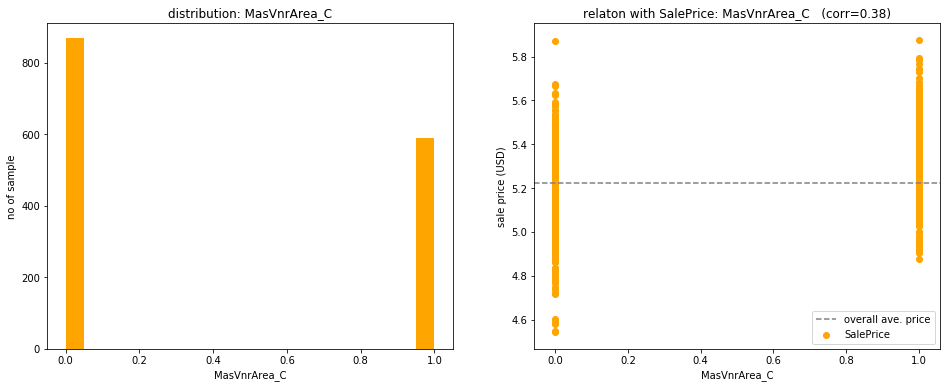

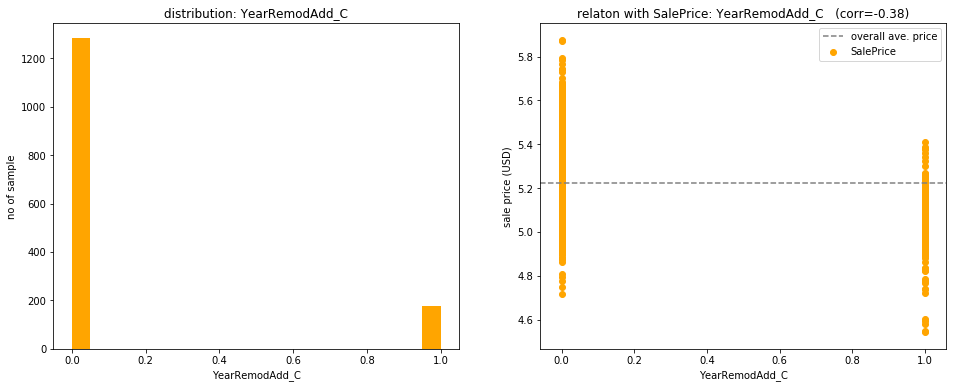

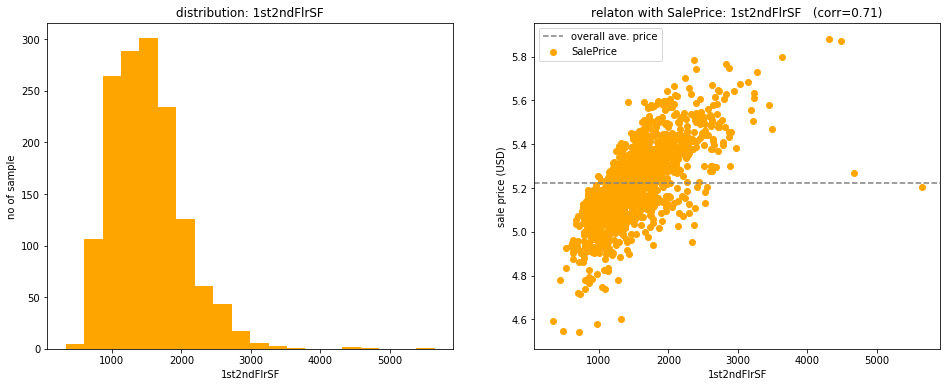

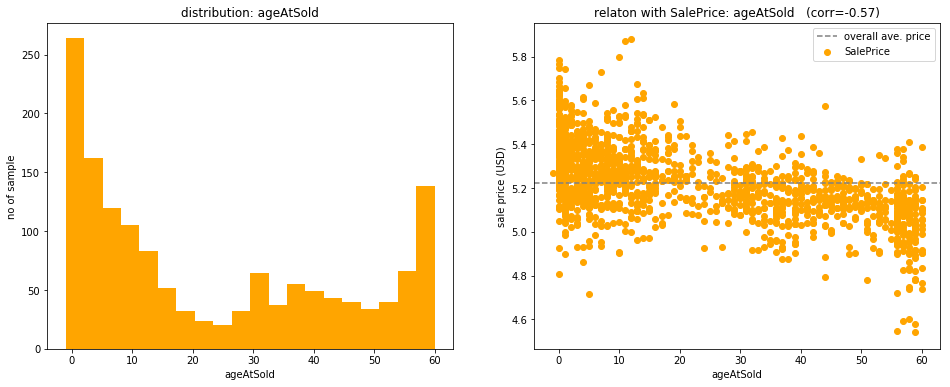

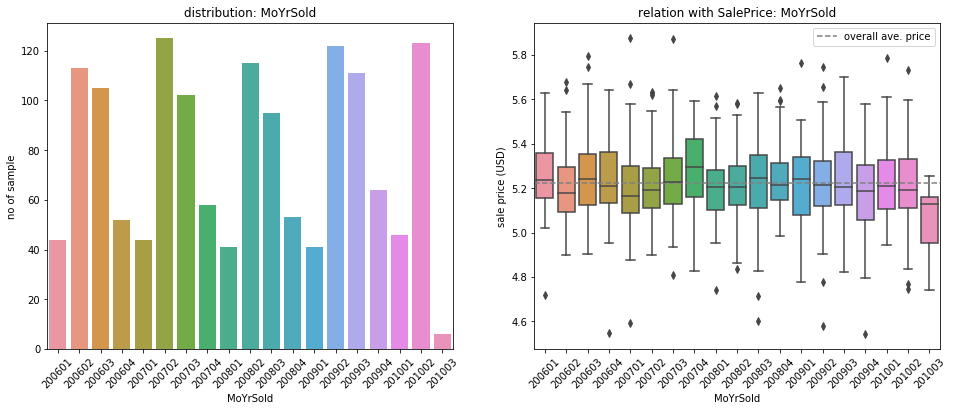

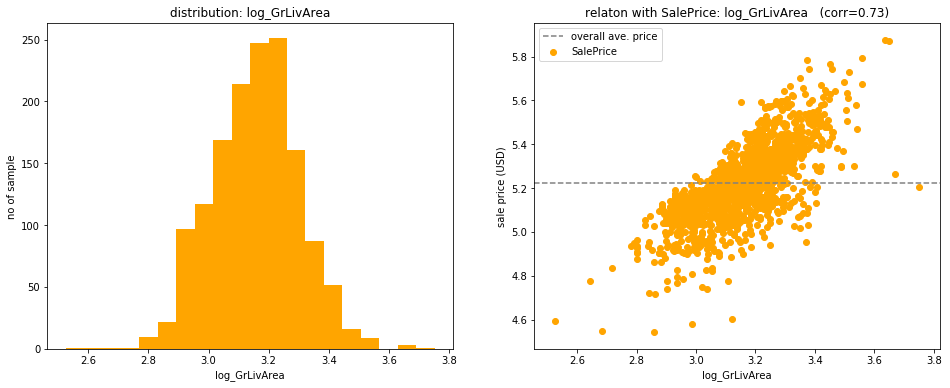

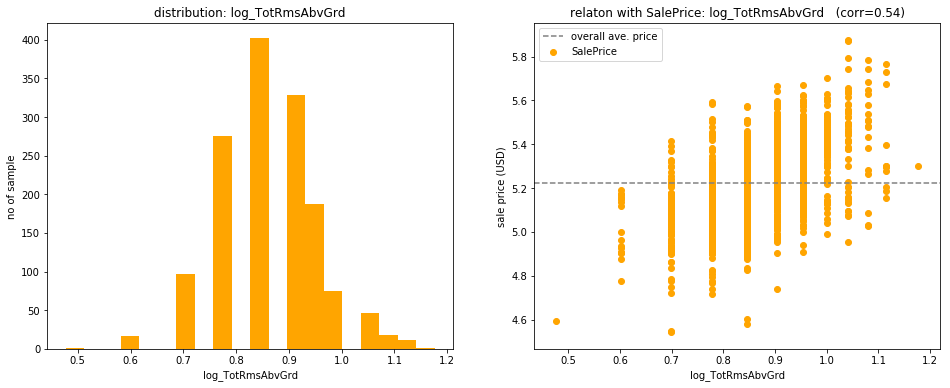

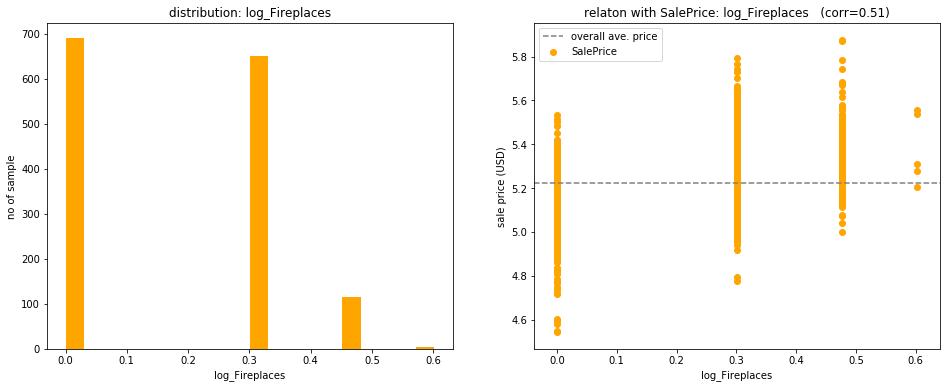

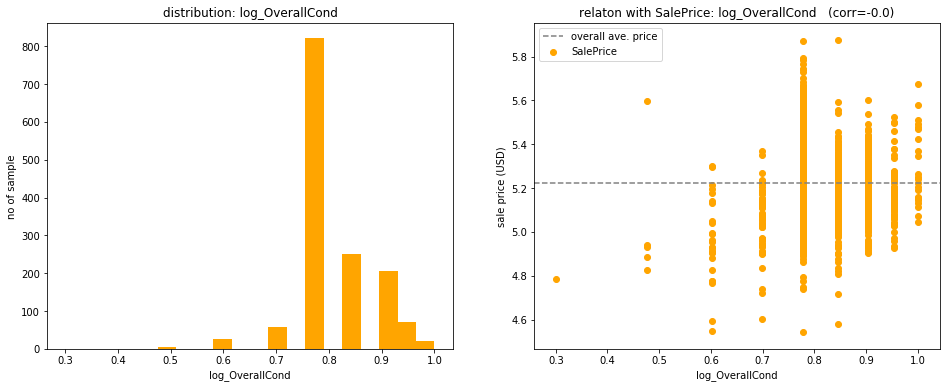

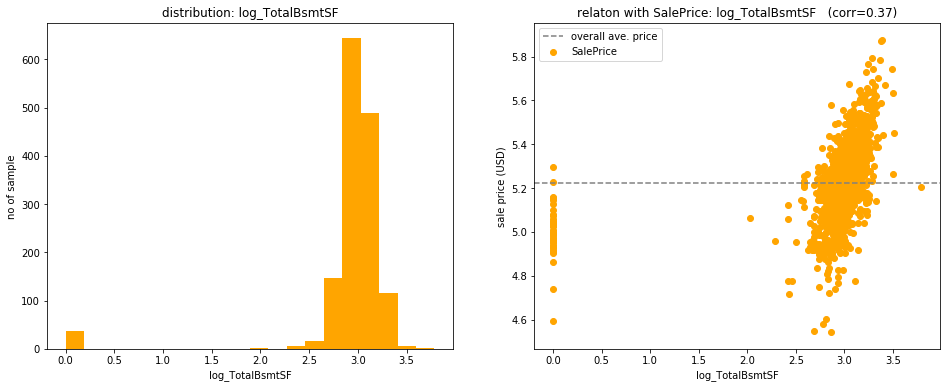

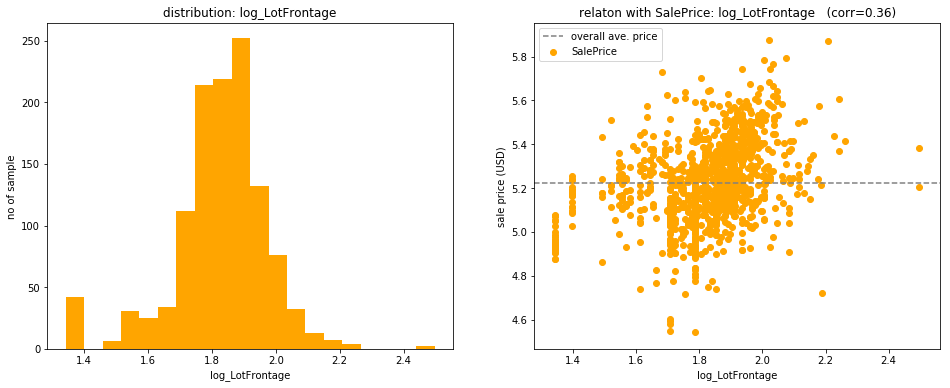

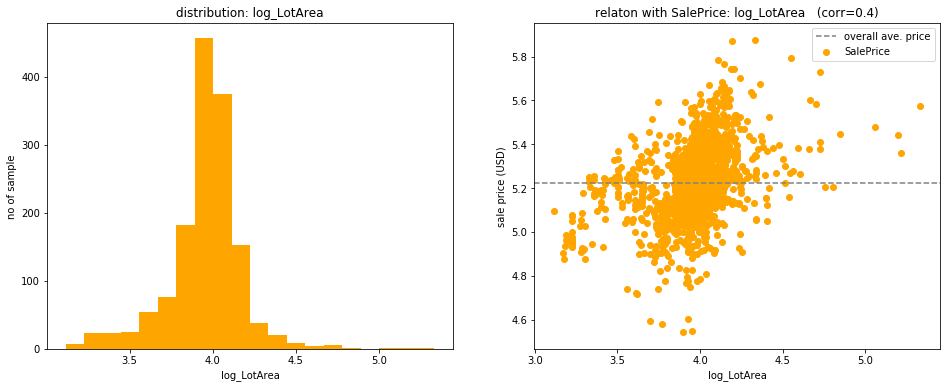

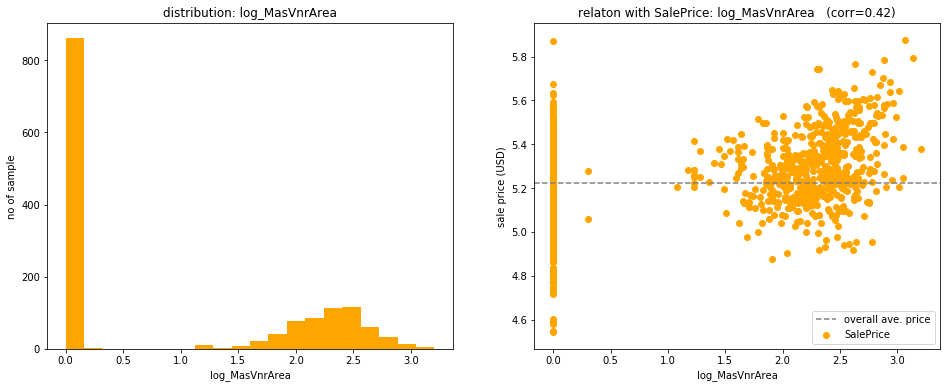

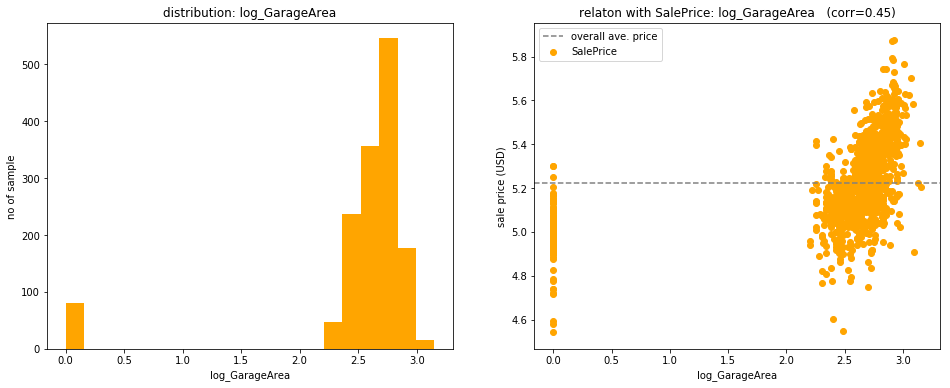

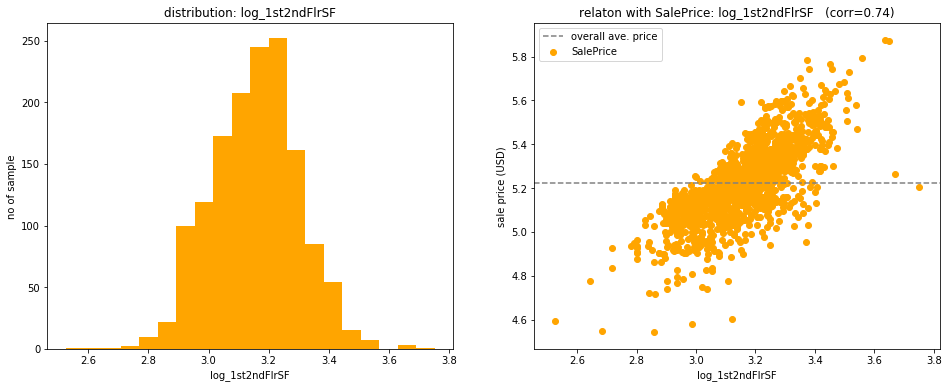

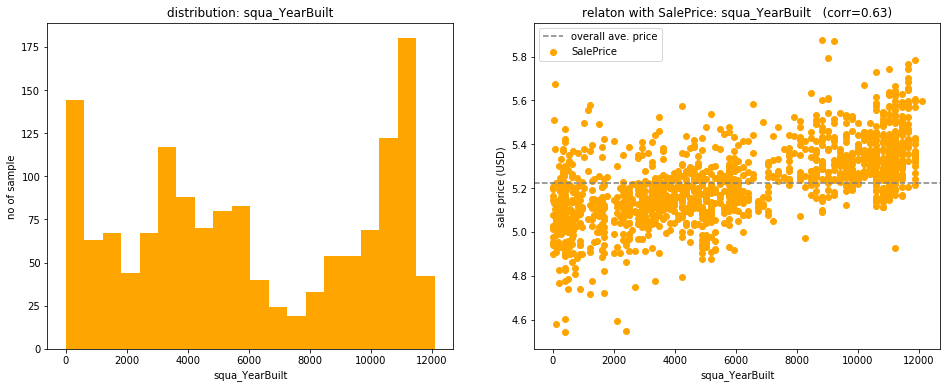

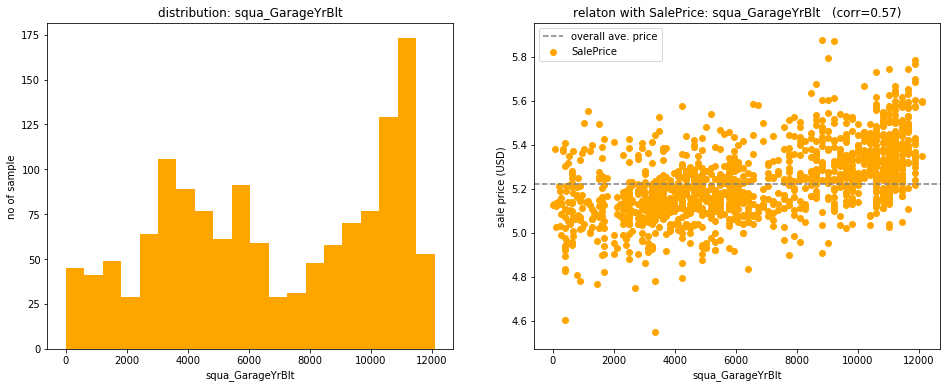

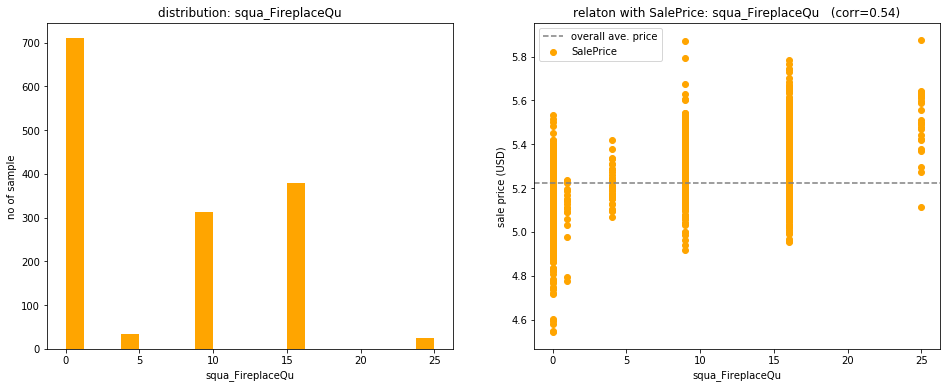

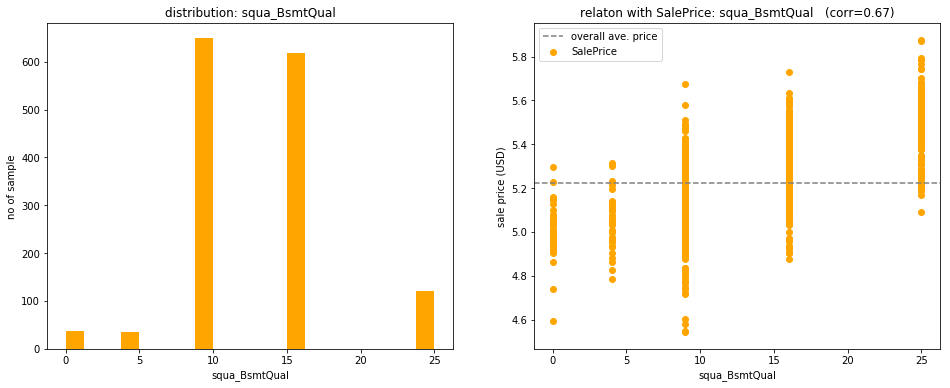

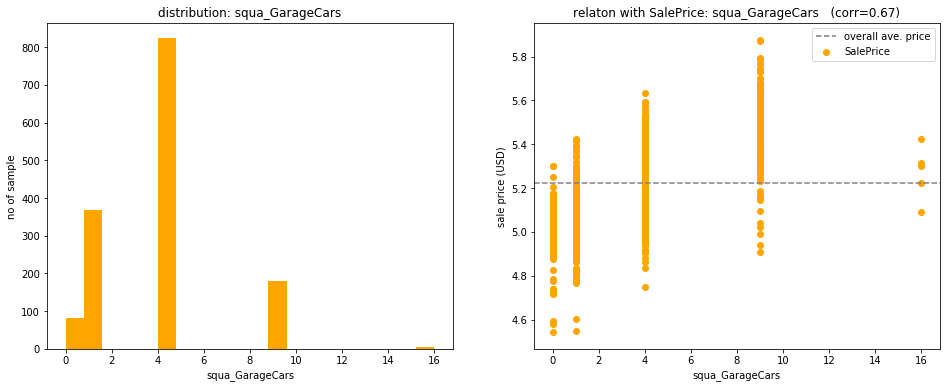

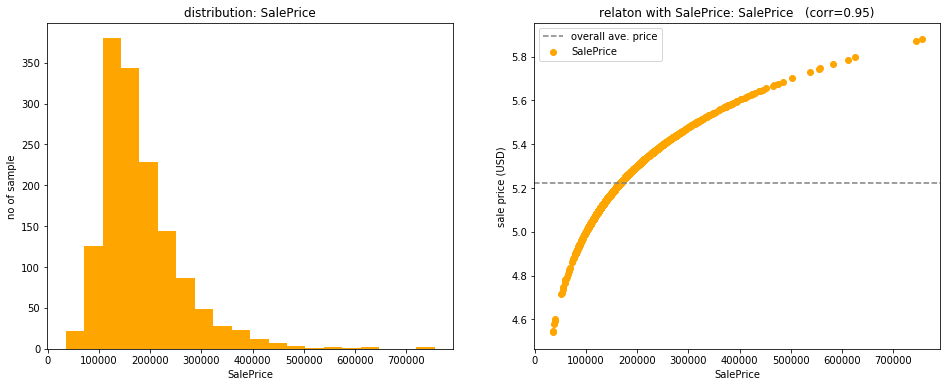

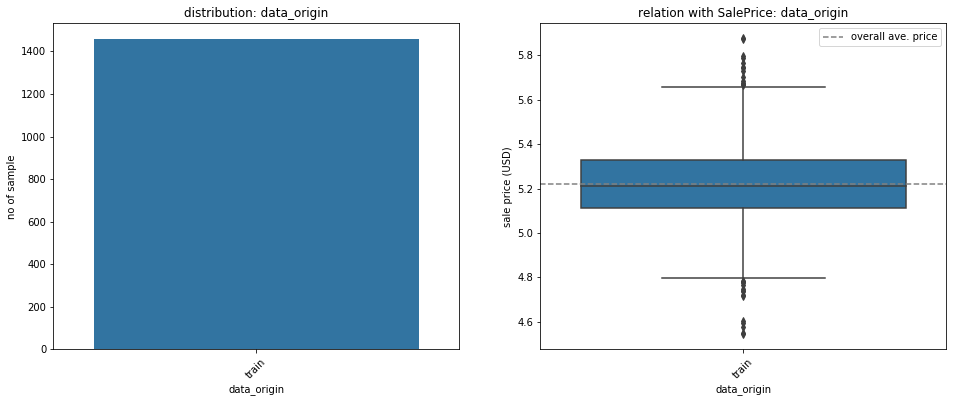

In [106]:
y_price =    np.log10(newFeatures_test['SalePrice'])
price_mean = y_price.mean()

corr_series = pd.Series([])



for column_name in newFeatures_test:
    dt = newFeatures_test[column_name].dtypes
    #print(column_name, '\t\t(',dt,')')

    if dt == 'object':
        fig = plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        ax = sns.countplot(x=newFeatures_test[column_name], data=newFeatures_test)
        ax.set_title('distribution: '+column_name)
        ax.set_ylabel('no of sample')
        plt.xticks(rotation=45)
        plt.subplot(1,2,2)
        bx = sns.boxplot(x=newFeatures_test[column_name], y=y_price)
        bx.set_title('relation with SalePrice: '+column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        plt.xticks(rotation=45)
        fig.show()


    else: 

        corr = newFeatures_test[column_name].corr(y_price).round(2)

        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(1,2,1)
        ax.hist(newFeatures_test[column_name], color='orange', bins = 20)
        ax.set_title('distribution: '+column_name )
        ax.set_xlabel(column_name)
        ax.set_ylabel('no of sample')
        bx = fig.add_subplot(1,2,2)
        bx.scatter(newFeatures_test[column_name], y_price,color='orange')
        bx.set_title('relaton with SalePrice: '+column_name  + '   (corr=' + str(corr) +')')
        bx.set_xlabel(column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        fig.show()

        corr_series.set_value(column_name, corr)

        

# Step 3-2 : Reducing the features
<hr>


(TBD) maybe using PCA to reduce the features

<br> 


# Step3-3 : Finalising variables to be used for prediction
<hr>

In [150]:
newFeatures.head()

GarageQual_N  GarageCond_N  PoolQC_N  ExterQual_N  ExterCond_N  BsmtQual_N  \
0             3             3         0            4            3           4   
1             3             3         0            3            3           4   
2             3             3         0            4            3           4   
3             3             3         0            3            3           3   
4             3             3         0            4            3           4   

   BsmtCond_N  HeatingQC_N  KitchenQual_N  FireplaceQu_N     ...       \
0           3            5              4              0     ...        
1           3            5              3              3     ...        
2           3            5              4              3     ...        
3           4            4              4              4     ...        
4           3            5              4              3     ...        

   log_MasVnrArea  log_GarageArea  log_1st2ndFlrSF  squa_YearBuilt  \
0        2.294466        2.739572         3.233250           10609   
1        0.000000        2.663701         3.101403            5776   
2        2.212188        2.784617         3.252125           10201   
3        0.000000        2.808211         3.235023             225   
4        2.545307        2.922725         3.342225           10000   

   squa_GarageYrBlt  squa_FireplaceQu  squa_BsmtQual  squa_GarageCars  \
0           10609.0                 0             16              4.0   
1            5776.0                 9             16              4.0   
2           10201.0                 9             16              4.0   
3            9604.0                16              9              9.0   
4           10000.0                 9             16              9.0   

   SalePrice  data_origin  
0   208500.0        train  
1   181500.0        train  
2   223500.0        train  
3   140000.0        train  
4   250000.0        train  

[5 rows x 42 columns]

In [187]:
# put all the variables 
newFeatures2 = newFeatures.drop(['SalePrice','data_origin'], axis=1)
integ2 = pd.concat([integ, newFeatures2],axis=1 )




In [206]:
# clean up the variables 

integ2 = integ2.fillna(value=0)

<br><br>
# Step 4 : Splitting the dataset for modeling
<hr>

here split the "training" data into "traiing" and "pre-test" and use "training" for building model, and "pre-test" for testing.
Given "test data" is for submitting, therefore that is not for internal testing in true meaning (?)

In [207]:
# install sklearn library first
from sklearn.model_selection import train_test_split

In [208]:
# divide into test and train 
train = integ2[integ2['data_origin']=='train']
test  = integ2[integ2['data_origin']=='test']

# drop Target Value 

train_salePrice = train['SalePrice']
train           = train.drop('SalePrice',axis=1)
test            = test.drop('SalePrice',axis=1)


# remove string columns 

train  = train.drop(train.select_dtypes(include='object'),axis =1)
test   = test.drop(test.select_dtypes(include='object'),axis =1)


print(train.shape, test.shape, train_salePrice.shape)

(1460, 76) (1459, 76) (1460,)


In [209]:
x_train, x_pretest, y_train, y_pretest = train_test_split(train, train_salePrice, test_size=0.3)

In [210]:
print(x_train.shape, y_train.shape, x_pretest.shape,y_pretest.shape)

(1022, 76) (1022,) (438, 76) (438,)


In [211]:
x_test = test

<br><br>
# Step 5 : Creating the model
<hr>

Here use Multilinear regression for prediction.
<br><br> The reasons are: <br><br>
- this is one of the basic and easy to implement (others I do not know) 
- predicted variable (Sale Price of the House) is quantitative variable(If that was a qualitative data, may used logistic regression)<br><br>

In [212]:
from sklearn import linear_model

Using multiple variables to estimate

In [213]:
X = x_train
Y = np.log10(y_train)

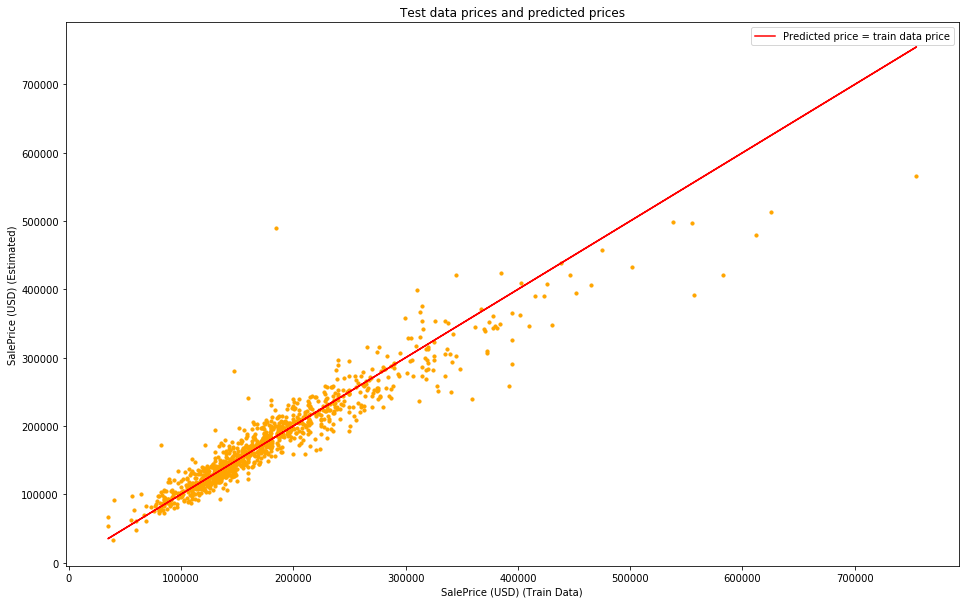

In [214]:
linReg = linear_model.LinearRegression()
linReg.fit(X,Y)

figdataX = 10**Y
figdataY = 10**linReg.predict(X)

plt.figure(figsize=(16,10))
plt.plot(figdataX,figdataX,color='red', label='Predicted price = train data price')
plt.scatter(figdataX,figdataY, s=10, c='orange')
plt.title('Test data prices and predicted prices')
plt.xlabel('SalePrice (USD) (Train Data)')
plt.ylabel('SalePrice (USD) (Estimated)')
plt.legend()

In [216]:
print('score:',linReg.score(X,Y))

score: 0.9059415671903054


<br><br><br>
# Step 6 : Evaluating/Modifying of the model
<hr>

Using another part of dataset, evaluate the model

<br><br>

According to project overview, the KPI for the evaluation for this project is: <br><br>
Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price
https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation

Here, apply the model to pre-test data

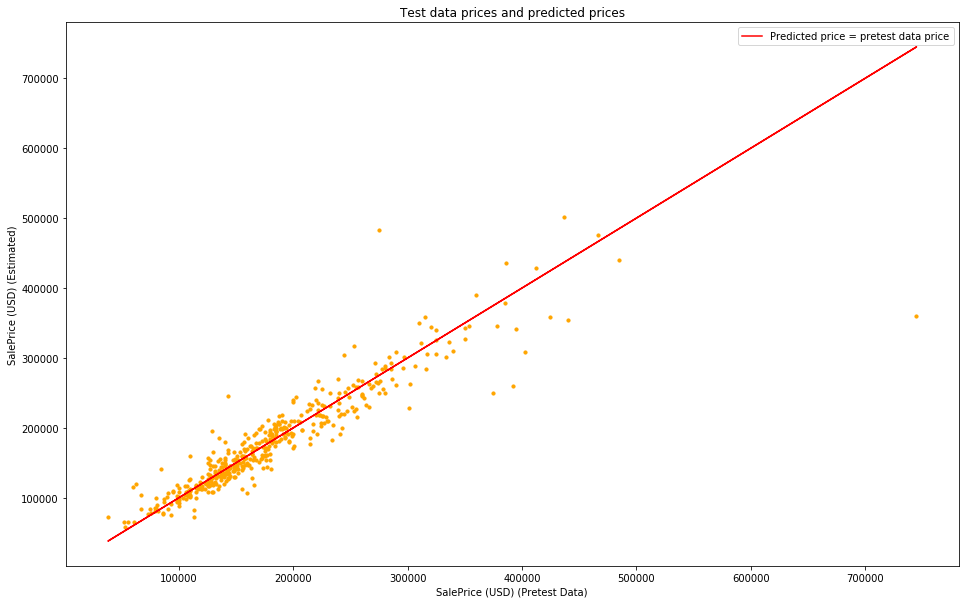

In [218]:
y_pred = pd.Series(linReg.predict(x_pretest))


figdataX = y_pretest
figdataY = 10**y_pred

plt.figure(figsize=(16,10))
plt.plot(figdataX,figdataX,color='red', label='Predicted price = pretest data price')
plt.scatter(figdataX,figdataY, s=10, c='orange')
plt.title('Test data prices and predicted prices')
plt.xlabel('SalePrice (USD) (Pretest Data)')
plt.ylabel('SalePrice (USD) (Estimated)')
plt.legend()

In [228]:
coef = pd.DataFrame(data=linReg.coef_)
columns = pd.DataFrame(data=train.columns)
coef = pd.concat([columns,coef],axis=1)
coef.columns = ['variable','coef']
coef['coef-abs']=np.abs(coef['coef'])

coef.sort_values('coef-abs',ascending=False)

variable          coef      coef-abs
54      GarageArea_C  1.937294e+00  1.937294e+00
53        PoolArea_C -1.592747e+00  1.592747e+00
62  log_TotRmsAbvGrd -6.431445e-01  6.431445e-01
63    log_Fireplaces  5.967627e-01  5.967627e-01
70   log_1st2ndFlrSF  5.703257e-01  5.703257e-01
61     log_GrLivArea  3.121846e-01  3.121846e-01
67       log_LotArea  1.163422e-01  1.163422e-01
24        Fireplaces -8.105529e-02  8.105529e-02
46     FireplaceQu_N -6.170847e-02  6.170847e-02
42        BsmtQual_N -6.016420e-02  6.016420e-02
64   log_OverallCond -5.757862e-02  5.757862e-02
55        2ndFlrSF_C -5.409170e-02  5.409170e-02
22      KitchenAbvGr -5.403168e-02  5.403168e-02
23      TotRmsAbvGrd  4.037965e-02  4.037965e-02
26        GarageCars -4.025882e-02  4.025882e-02
65   log_TotalBsmtSF  3.267706e-02  3.267706e-02
5        OverallCond  2.784525e-02  2.784525e-02
39          PoolQC_N  2.676878e-02  2.676878e-02
52   EnclosedPorch_C -2.658695e-02  2.658695e-02
4        OverallQual  2.497012e-02  2.497012e-02
17      BsmtFullBath  2.133922e-02  2.133922e-02
37      GarageQual_N  2.054738e-02  2.054738e-02
69    log_GarageArea  1.985534e-02  1.985534e-02
19          FullBath  1.883467e-02  1.883467e-02
56      BsmtFinSF1_C  1.589027e-02  1.589027e-02
75   squa_GarageCars  1.474305e-02  1.474305e-02
20          HalfBath  1.427148e-02  1.427148e-02
58    YearRemodAdd_C -1.298548e-02  1.298548e-02
47      PavedDrive_N  1.284553e-02  1.284553e-02
40       ExterQual_N  1.129818e-02  1.129818e-02
..               ...           ...           ...
18      BsmtHalfBath  1.594455e-03  1.594455e-03
7       YearRemodAdd -1.287404e-03  1.287404e-03
60         ageAtSold -1.260367e-03  1.260367e-03
25       GarageYrBlt -1.034632e-03  1.034632e-03
6          YearBuilt  7.358793e-04  7.358793e-04
43        BsmtCond_N -4.565374e-04  4.565374e-04
35            MoSold  1.900645e-04  1.900645e-04
2        LotFrontage -1.856228e-04  1.856228e-04
30     EnclosedPorch  1.844564e-04  1.844564e-04
32       ScreenPorch  1.270763e-04  1.270763e-04
8         MasVnrArea  6.864156e-05  6.864156e-05
1         MSSubClass -6.849260e-05  6.849260e-05
13          1stFlrSF -5.749531e-05  5.749531e-05
59       1st2ndFlrSF -5.672862e-05  5.672862e-05
16         GrLivArea -4.363113e-05  4.363113e-05
29       OpenPorchSF -4.331710e-05  4.331710e-05
28        WoodDeckSF  2.624884e-05  2.624884e-05
12       TotalBsmtSF  2.070038e-05  2.070038e-05
15      LowQualFinSF  1.309751e-05  1.309751e-05
9         BsmtFinSF1  1.225126e-05  1.225126e-05
11         BsmtUnfSF  7.650959e-06  7.650959e-06
72  squa_GarageYrBlt  7.024566e-06  7.024566e-06
27        GarageArea -6.160369e-06  6.160369e-06
31         3SsnPorch  5.488790e-06  5.488790e-06
71    squa_YearBuilt  2.457105e-06  2.457105e-06
0                 Id -1.535459e-06  1.535459e-06
10        BsmtFinSF2  7.981748e-07  7.981748e-07
14          2ndFlrSF  7.666857e-07  7.666857e-07
3            LotArea -5.990346e-07  5.990346e-07
34           MiscVal  4.273190e-07  4.273190e-07

[76 rows x 3 columns]

<br><br>
Then calculate RMSE of logarithm 
<br><br>

In [226]:
from sklearn.metrics import mean_squared_error

log_y_true = np.log(figdataX)
log_y_pred = np.log(figdataY)

mse = mean_squared_error(log_y_true, log_y_pred)

rmse = np.sqrt(mse)

rmse

0.13557241877219706

0.175 is about 3300/4300 in the ranking  <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard

<br><br><br>
# Step 7 : Submitting the model
<hr>

### apply the model to test data set

In [221]:
x_test.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1       ...         \
0       1961          1961         0.0       468.0       ...          
1       1958          1958       108.0       923.0       ...          
2       1997          1998         0.0       791.0       ...          
3       1998          1998        20.0       602.0       ...          
4       1992          1992         0.0       263.0       ...          

   log_LotFrontage  log_LotArea  log_MasVnrArea  log_GarageArea  \
0         1.908485     4.065318        0.000000        2.863917   
1         1.913814     4.154363        2.037426        2.495544   
2         1.875061     4.140854        0.000000        2.683947   
3         1.897627     3.999087        1.322219        2.673021   
4         1.643453     3.699491        0.000000        2.705008   

   log_1st2ndFlrSF  squa_YearBuilt  squa_GarageYrBlt  squa_FireplaceQu  \
0         2.952792            3721            3721.0                 0   
1         3.123852            3364            3364.0                 0   
2         3.212188            9409            9409.0                 9   
3         3.205475            9604            9604.0                16   
4         3.107549            8464            8464.0                 0   

   squa_BsmtQual  squa_GarageCars  
0              9              1.0  
1              9              1.0  
2             16              4.0  
3              9              4.0  
4             16              4.0  

[5 rows x 76 columns]

In [222]:
y_pred = pd.Series(linReg.predict(x_test))
y_pred_price = 10**y_pred
y_pred_price.describe()


count    1.459000e+03
mean     1.876376e+05
std      4.000257e+05
min      2.970180e+04
25%      1.258365e+05
50%      1.591915e+05
75%      2.094915e+05
max      1.517486e+07
dtype: float64

### formatting the data file to align with the requirement 

In [224]:
submission = pd.concat([x_test['Id'],y_pred_price], axis=1)
submission.columns = ['id','SalePrice']
submission.to_csv('second_model.csv', index=None)

# submit   <br>

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Next steps <br>

- Mutual relationship -> PCA
- random forest 
- Cat boost 
- python reputation?